# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model building
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# for model evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",200)
pd.set_option("display.max_colwidth",200)
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Leads.csv')

In [3]:
df1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There have been many columns that have null values so will be considering to have them imputed. But before we will get a count of the number of columns and the percentages of null values that they contain which will help us in the further steps to be taken.

In [6]:
df1.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As there are 9000 data points in the dataframe and we are seeing some of the columns having more null values. Instead of having to manipulate them by imputing, we figured it would be eliminate the columns having more than 3000 null values, keeping the rest of them

In [7]:
for c in df1.columns:
    if df1[c].isnull().sum()>3000:
        df1.drop(c,axis=1, inplace= True)

In [8]:
df1.size

286440

In [9]:
df1.shape

(9240, 31)

In [10]:
((df1.isnull().sum()/len(df1)).sort_values(ascending=False))

What matters most to you in choosing a course    0.293182
Lead Profile                                     0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Get updates on DM Content                        0.000000
Newspaper                                        0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recomm

In [11]:
df1.City.value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [12]:
df1.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

* The **Country and City columns** of the dataset are of no use since there is data imbalance and the major values belong to one or two values of these columns

* Hence we are dropping these columns as they haven't had much use for the analysis that we will be doing



In [13]:
df1.drop(['Country','City'],axis=1, inplace= True)

In [14]:
(100*(df1.isnull().sum()/len(df1))).sort_values(ascending= False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

### Visualising the Select Features

#### Data Types present in the database

In [15]:
df1.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [16]:
pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [17]:
value_counts_df = pd.DataFrame()
for c in df1.columns:
    value_counts_df[c] = df1[c].value_counts(dropna=False)


In [18]:
value_counts_df[c]

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620   NaN
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea   NaN
46befc49-253a-419b-abea-2fd978d2e2b1   NaN
9d35a2c2-09d8-439f-9875-0e8bbf267f5a   NaN
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5   NaN
                                        ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3   NaN
644099a2-3da4-4d23-9546-7676340a372b   NaN
2a093175-415b-4321-9e69-ed8d9df65a3c   NaN
c66249a3-8500-4c66-a511-312d914573de   NaN
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff   NaN
Name: Last Notable Activity, Length: 9240, dtype: float64

In [19]:
df1.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
select_cols = ['How did you hear about X Education','Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course']



In [22]:
df1.columns = df1.columns.str.strip()

#### Visualising the categorical columns to see how the dataset is distributed among various variables against the hue of 'Converted' variable 

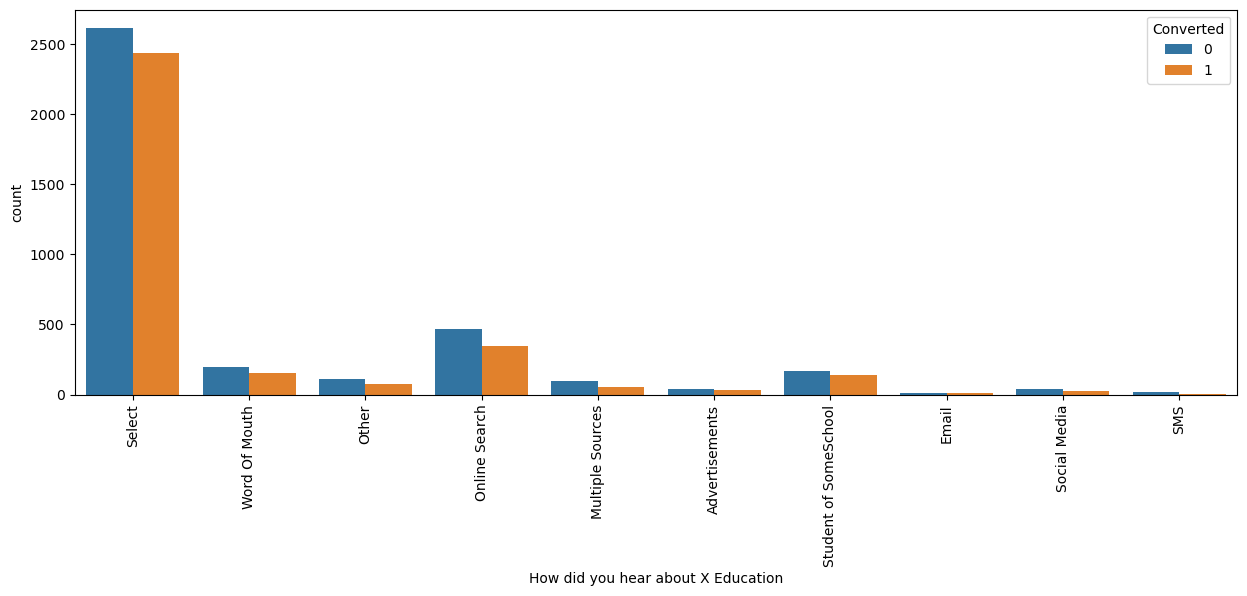

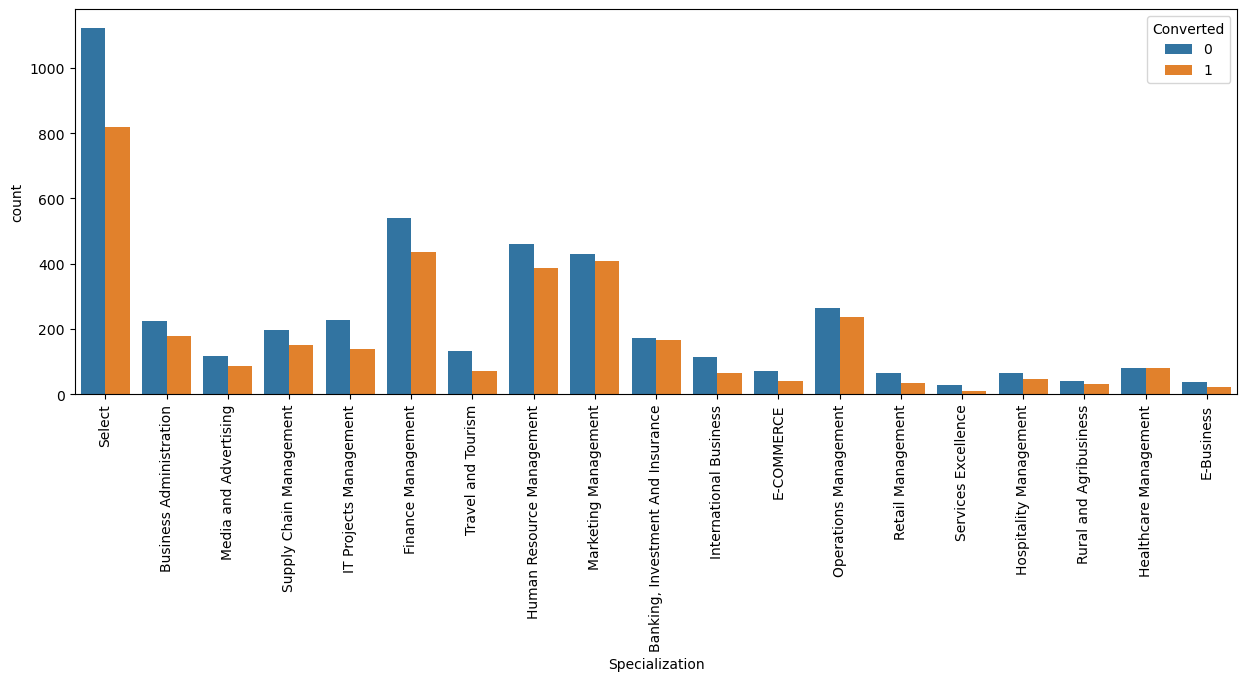

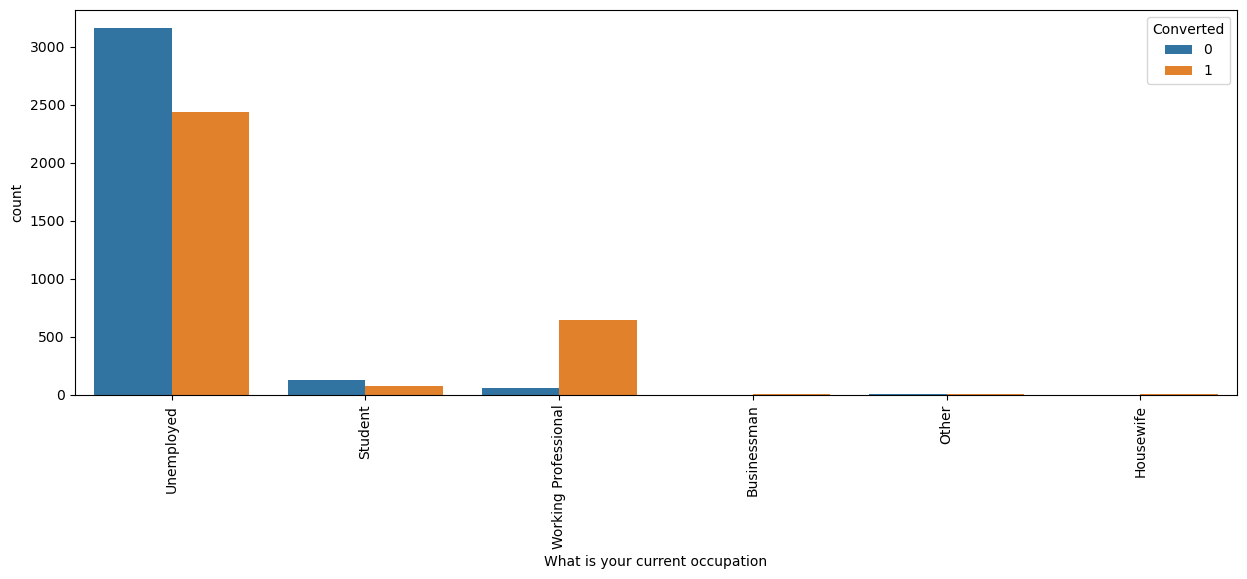

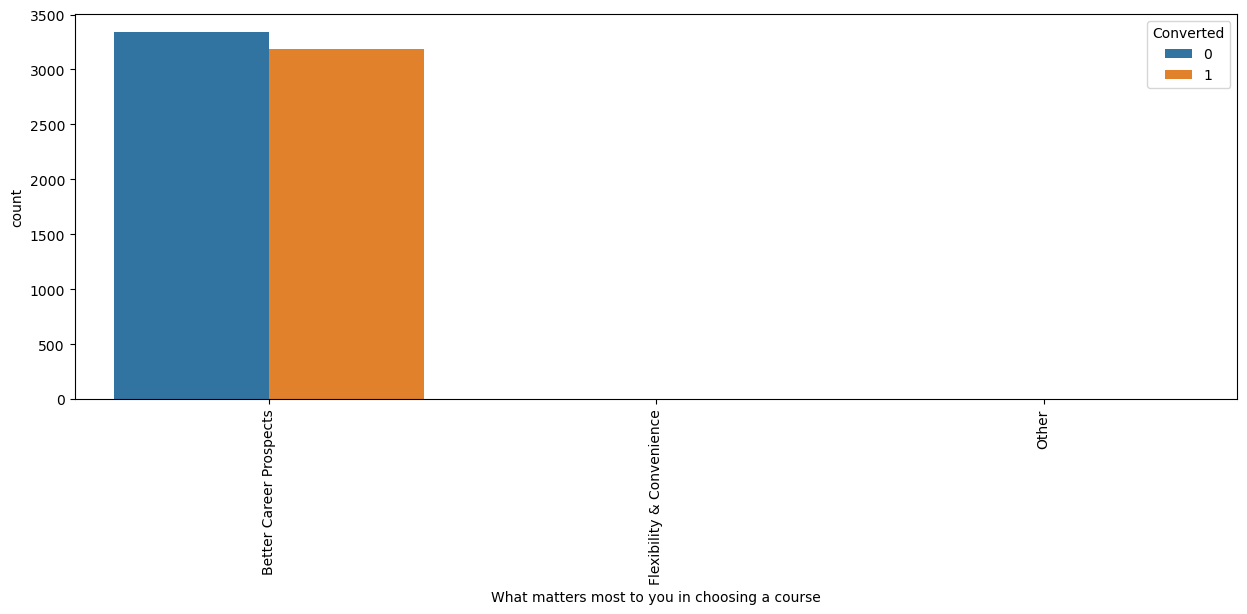

In [23]:
for col in select_cols:
    plt.figure(figsize=(15,5))
    s1 = sns.countplot(x=df1[col], hue=df1.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

* 'What is your current occupation' against the hue of Converted has a very close number of values in both the Converted and Not Converted values

In [24]:
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
df1.drop(columns= ['Prospect ID'], inplace = True)

In [26]:
df1.shape

(9240, 28)

* We will be looking at some of the crucial columns to see where we can impute the values looking at the value counts of the null values and the otherwise.

In [27]:
df1['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [28]:
df1['Specialization'] = df1['Specialization'].replace(np.NaN, 'Not Specified')

* We are specifying the null values as Not Specified 

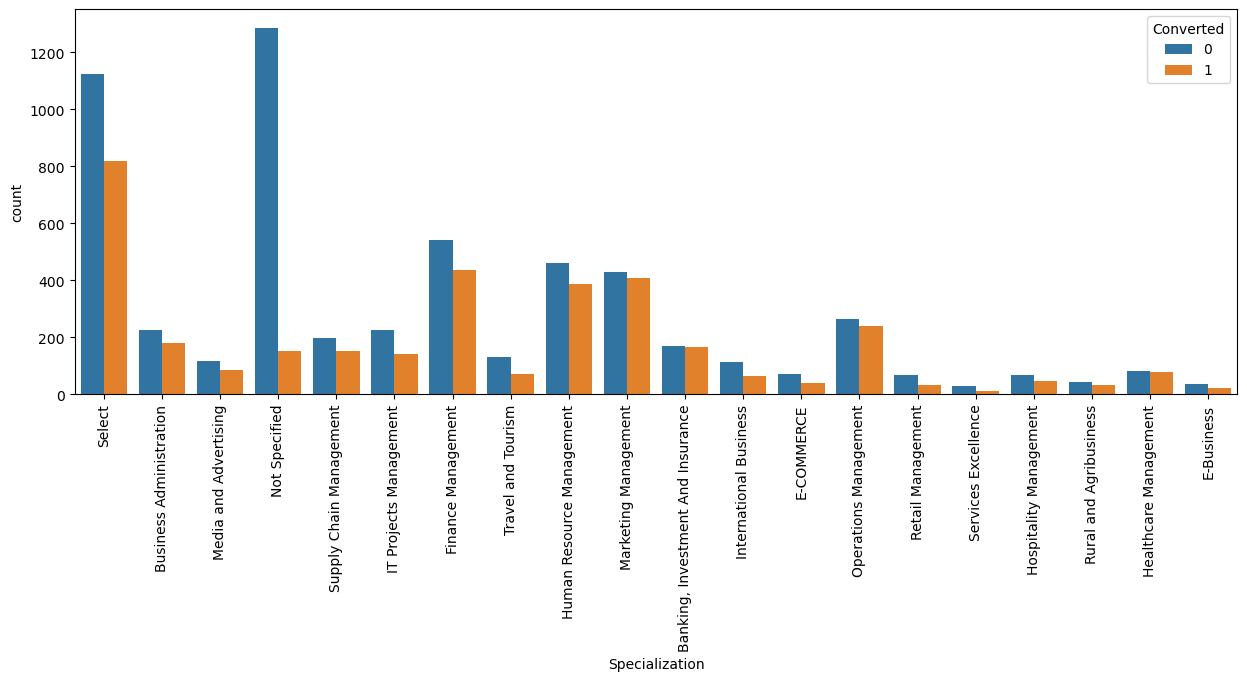

In [29]:
plt.figure(figsize=(15,5))

s1= sns.countplot(x=df1.Specialization, hue = df1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can observe a pattern in the specialisation in the management sectors, we can merge them all into one specialization labelled as Management

In [30]:
df1['Specialization'] = df1['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'],'Management_Specializations')

In [31]:
df1['Specialization'].value_counts()

Specialization
Management_Specializations           4253
Select                               1942
Not Specified                        1438
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

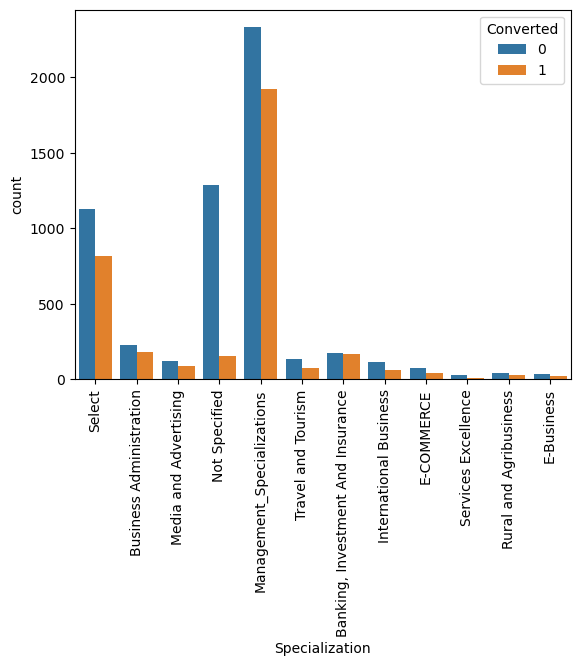

In [32]:
s1 =sns.countplot(x=df1['Specialization'],hue=df1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


* We can notice that the Management_Specialization has the highest number of people converted compared to the people who are not converted.
* None of the categories can be seen having a high conversion ratio

In [231]:
df1.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'L_Origin_Landing Page Submission', 'L_Origin_Lead Add Form',
       'L_Origin_Lead Import', 'L_Source_Direct Traffic', 'L_Source_Google',
       'L_Source_Olark Chat', 'L_Source_Organic Search',
       'L_Source_Pay per Click Ads', 'L_Source_Reference',
       'L_Source_Referral Sites', 'L_Source_Social Media',
       'L_Source_Welingak Website', 'L_Source_testone',
       'LAct_Converted to Lead', 'LAct_Email Bounced',
       'LAct_Email Link Clicked', 'LAct_Email Opened',
       'LAct_Form Submitted on Website', 'LAct_Olark Chat Conversation',
       'LAct_Page Visited on Website', 'LAct_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Manageme

In [33]:
df1['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

There is a possibility that the people who would have not chosen any other option and classified as NaN ,hence we will impute the maximum value that is (Unemployed) to the NaN values

In [34]:
df1= df1.dropna(subset=['What is your current occupation','TotalVisits','Page Views Per Visit'])

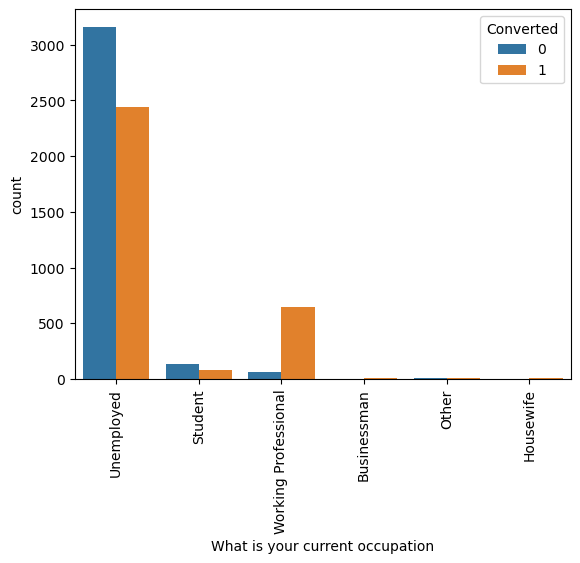

In [35]:
s1 =sns.countplot(x=df1['What is your current occupation'],hue=df1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* We can infer from the graph that there is a higher conversion in the working professionals to take up the courses. Hence we can target the working professionals in selling these courses
* And unemployed people are most in absolute numbers

In [36]:
df1['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                            19
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [37]:
df1=df1.dropna(subset=['What matters most to you in choosing a course'])

* We choose to drop the column as there is a significant data imbalance and the column would not be of any use for the data analysis going further.

In [38]:
df1['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

* We can drop this column as it holds no significance for us in the analysis further


In [39]:
df1.drop(columns= ['What matters most to you in choosing a course'], inplace = True)

In [40]:
df1['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         74
Facebook               46
NaN                    36
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64

In [41]:
df1.shape

(6531, 27)

##### A few values which have very few value counts can be clubbed together into one column called **Others** whereas the other values can be conjoined to other values as there is a factor of commonality between them.

In [42]:
df1['Lead Source']= df1['Lead Source'].replace(np.NaN,'Others')
df1['Lead Source']= df1['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','testone'
'Pay per Click Ads'      
,'welearnblog_Home','WeLearn'
,'blog'
,'NC_EDM'],'Others')
df1['Lead Source']= df1['Lead Source'].replace('Facebook','Social Media')


In [43]:
df1['Lead Source']= df1['Lead Source'].replace('google','Google')

In [44]:
df1['Lead Source'].value_counts()

Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         74
Social Media           48
Others                 47
Pay per Click Ads       1
testone                 1
Name: count, dtype: int64

In [45]:
df1['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         74
Social Media           48
Others                 47
Pay per Click Ads       1
testone                 1
Name: count, dtype: int64

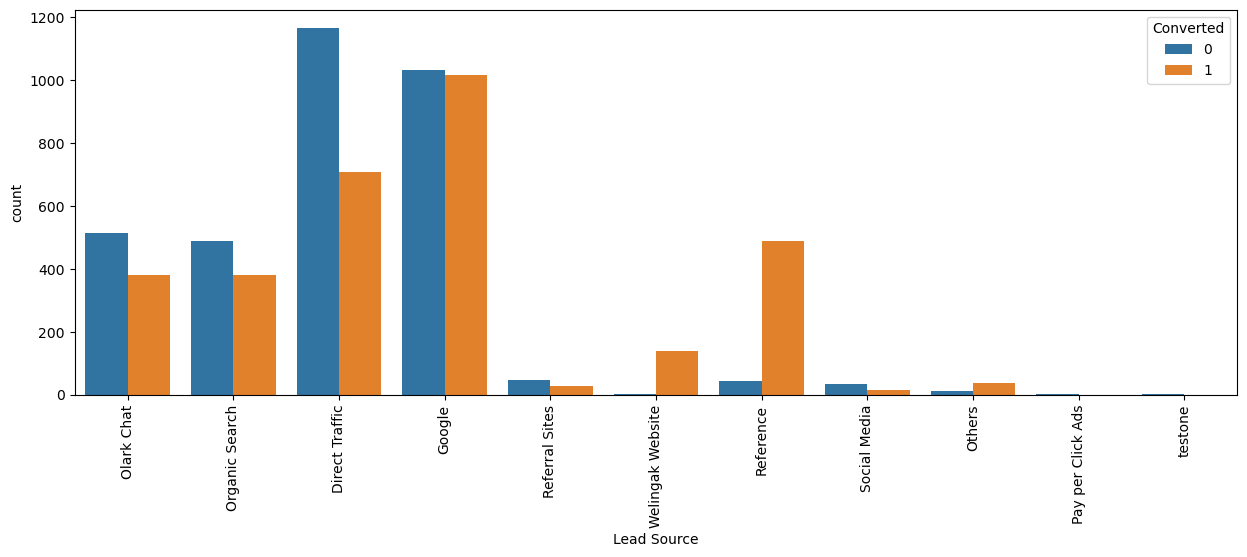

In [46]:
plt.figure(figsize=(15,5))
s1 =sns.countplot(x=df1['Lead Source'],hue=df1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
df1['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    2460
SMS Sent                        2212
Olark Chat Conversation          428
Page Visited on Website          426
Converted to Lead                292
Email Bounced                    189
Email Link Clicked               178
NaN                              103
Form Submitted on Website         81
Unreachable                       74
Unsubscribed                      42
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [49]:
df1['Last Activity']= df1['Last Activity'].replace(np.NaN,'Others')
df1['Last Activity']= df1['Last Activity'].replace(['Unreachable',
'Unsubscribed',
'Had a Phone Conversation',
'Approached upfront',
'View in browser link Clicked',
'Email Received',
'Email Marked Spam',
'Visited Booth in Tradeshow',
'Resubscribed to emails'],'Others')

In [50]:
df1.isnull().sum()/len(df1)*100

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.990507
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.990507
Last Activity                               0.000000
Specialization                              0.000000
How did you hear about X Education          0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [51]:
df1['Lead Profile'].value_counts(dropna=False)

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [52]:
df1.isnull().sum()

Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 130
Total Time Spent on Website                   0
Page Views Per Visit                        130
Last Activity                                 0
Specialization                                0
How did you hear about X Education            0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

In [53]:
df1['How did you hear about X Education'].value_counts(dropna=False)

How did you hear about X Education
Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: count, dtype: int64

In [54]:
df1['How did you hear about X Education']= df1['How did you hear about X Education'].replace(np.NaN,'Others')

In [55]:
df1['How did you hear about X Education'].value_counts(dropna=False)

How did you hear about X Education
Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: count, dtype: int64

In [56]:
df1['Page Views Per Visit'].value_counts(dropna=False)

Page Views Per Visit
0.00     1375
2.00     1325
3.00      874
4.00      659
1.00      423
         ... 
3.43        1
2.56        1
4.75        1
16.00       1
2.08        1
Name: count, Length: 107, dtype: int64

In [57]:
df1.isnull().sum()

Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 130
Total Time Spent on Website                   0
Page Views Per Visit                        130
Last Activity                                 0
Specialization                                0
How did you hear about X Education            0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

In [58]:
df1['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    3625
API                        2141
Lead Add Form               718
Lead Import                  46
Quick Add Form                1
Name: count, dtype: int64

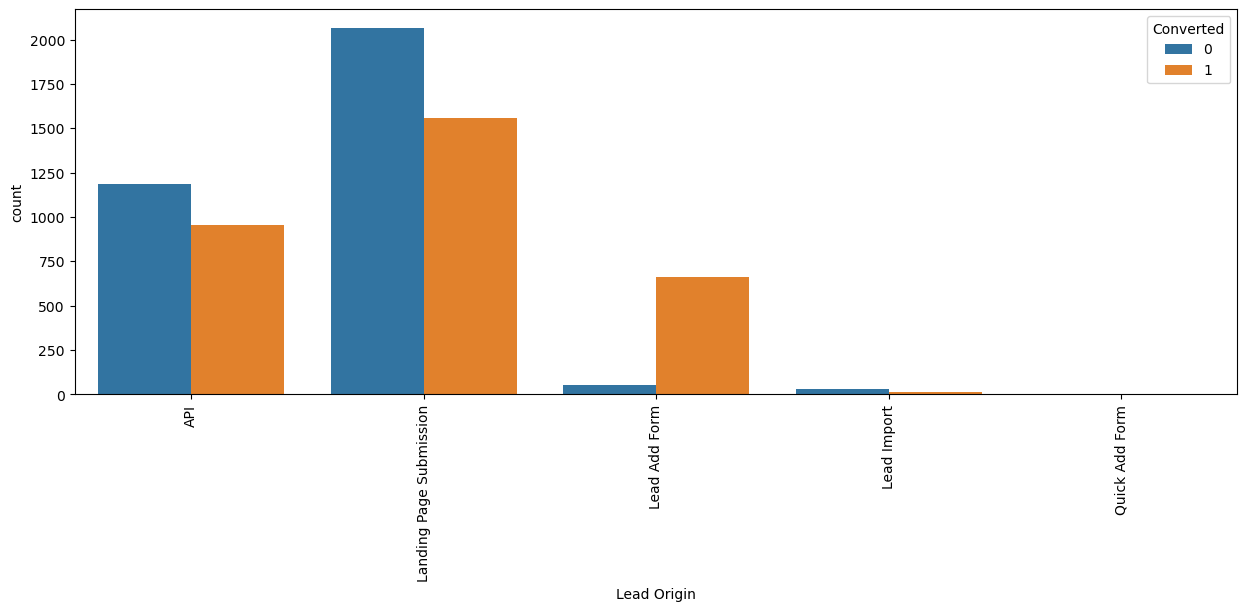

In [59]:
plt.figure(figsize=(15,5))
s1 =sns.countplot(x=df1['Lead Origin'],hue=df1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* We can observe that there is a high ratio of conversion unde the Lead Add Form variable compared to the other categories in the column

In [60]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

* Checking on the columns which have a Yes/No response to check for the data imbalance in order to gauge if it holds fit for the further analysis in the models to be created.

In [61]:
df1['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    6531
Name: count, dtype: int64

In [62]:
df1['Get updates on DM Content'].value_counts()


Get updates on DM Content
No    6531
Name: count, dtype: int64

In [63]:
df1['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    6531
Name: count, dtype: int64

In [64]:
df1['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     4360
Yes    2171
Name: count, dtype: int64

In [65]:
df1['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        2080
Email Opened                    2042
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: count, dtype: int64

In [66]:
df1['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     6079
Yes     452
Name: count, dtype: int64

In [67]:
df1['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     6529
Yes       2
Name: count, dtype: int64

In [68]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [69]:
df1['Search'].value_counts()


Search
No     6521
Yes      10
Name: count, dtype: int64

In [70]:
df1['Magazine'].value_counts()

Magazine
No    6531
Name: count, dtype: int64

In [71]:
df1['Newspaper Article'].value_counts()

Newspaper Article
No     6530
Yes       1
Name: count, dtype: int64

In [72]:
df1['X Education Forums'].value_counts()

X Education Forums
No    6531
Name: count, dtype: int64

In [73]:
df1['Newspaper'].value_counts()

Newspaper
No     6530
Yes       1
Name: count, dtype: int64

In [74]:
df1['Digital Advertisement'].value_counts()

Digital Advertisement
No     6528
Yes       3
Name: count, dtype: int64

In [75]:
df1['Through Recommendations'].value_counts(dropna=False)

Through Recommendations
No     6525
Yes       6
Name: count, dtype: int64

### Since all of these columns have data imbalance and are not useful for analysis , we will be dropping henceforth


In [76]:
cols_to_drop=['Do Not Email',
       'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque']

In [77]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
cols_to_drop

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [79]:
cols_to_drop.append('Update me on Supply Chain Content')

In [80]:
df1['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                        2080
Email Opened                    2042
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: count, dtype: int64

##### Since there were a lot of values which had less values which were insignificant , hence it can be considered to be clubbed into one single category which is Others_Notable Activities.

In [81]:
df1["Last Notable Activity"]=df1["Last Notable Activity"].replace(['Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received',
 'Email Marked Spam'],'Others_Notable_Activities')

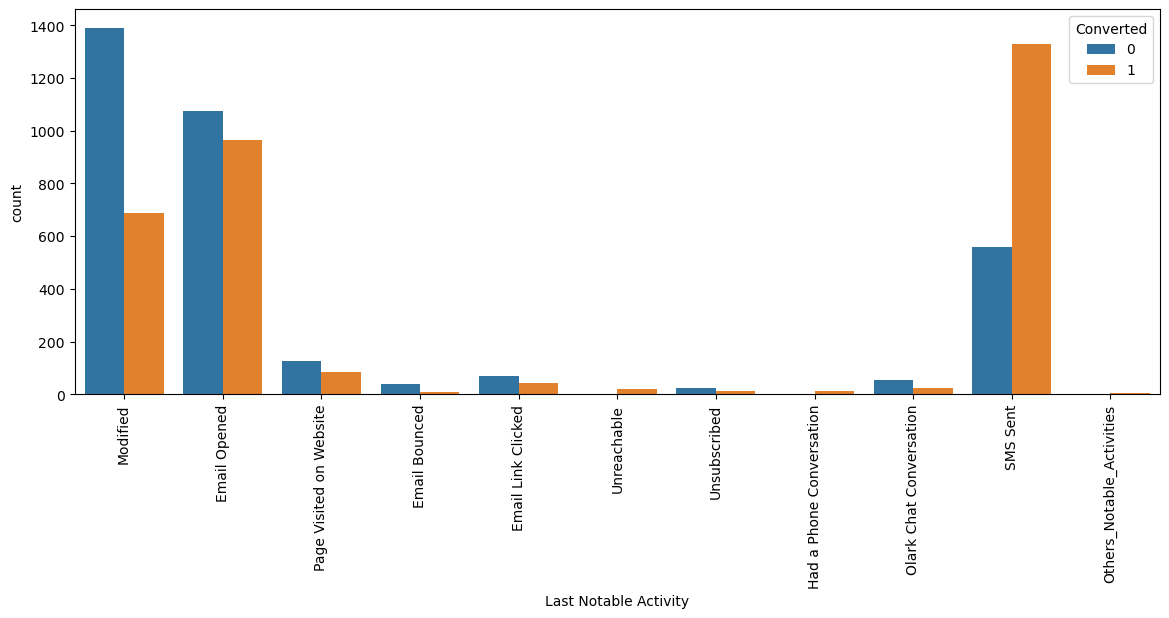

In [82]:
plt.figure(figsize = (14,5))
s3=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df1)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [83]:
df1 =df1.drop(cols_to_drop,axis=1)


In [84]:
df1.shape

(6531, 14)

### After dropping the unnecessary columns not required for analysis , we are left with 6401 data points with 14 columns.

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6531 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6531 non-null   int64  
 1   Lead Origin                             6531 non-null   object 
 2   Lead Source                             6531 non-null   object 
 3   Converted                               6531 non-null   int64  
 4   TotalVisits                             6401 non-null   float64
 5   Total Time Spent on Website             6531 non-null   int64  
 6   Page Views Per Visit                    6401 non-null   float64
 7   Last Activity                           6531 non-null   object 
 8   Specialization                          6531 non-null   object 
 9   How did you hear about X Education      6531 non-null   object 
 10  What is your current occupation         6531 non-null   object 
 

In [86]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [87]:
# The Converted Ratio 
Converted = (sum(df1['Converted'])/len(df1['Converted'].index))*100
Converted


48.85928647986526

In [88]:
df1.shape

(6531, 14)

In [89]:
df1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## The Visualisation of the Numerical Values

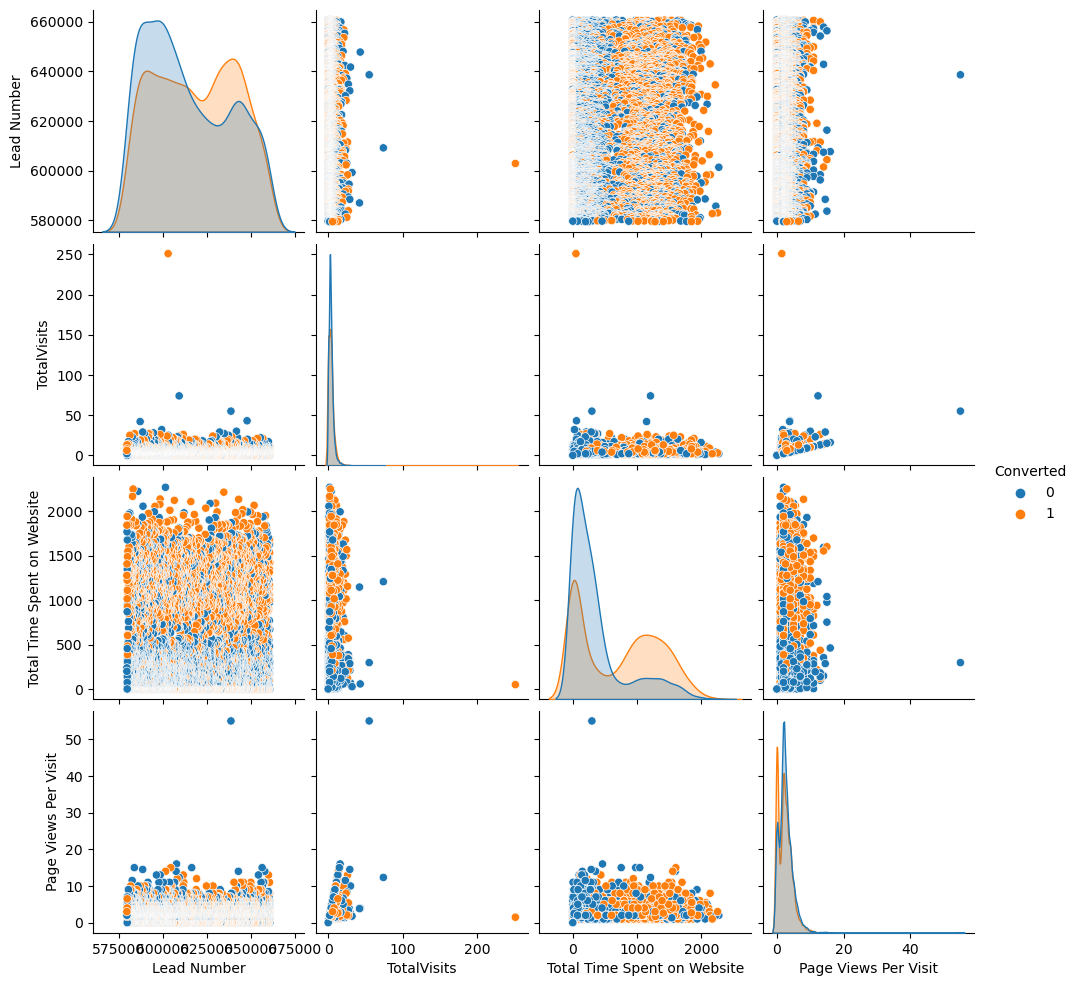

In [90]:
sns.pairplot(df1,diag_kind='kde',hue='Converted')
plt.show()

In [91]:
l1= df1[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [92]:
l2 = df1[['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]

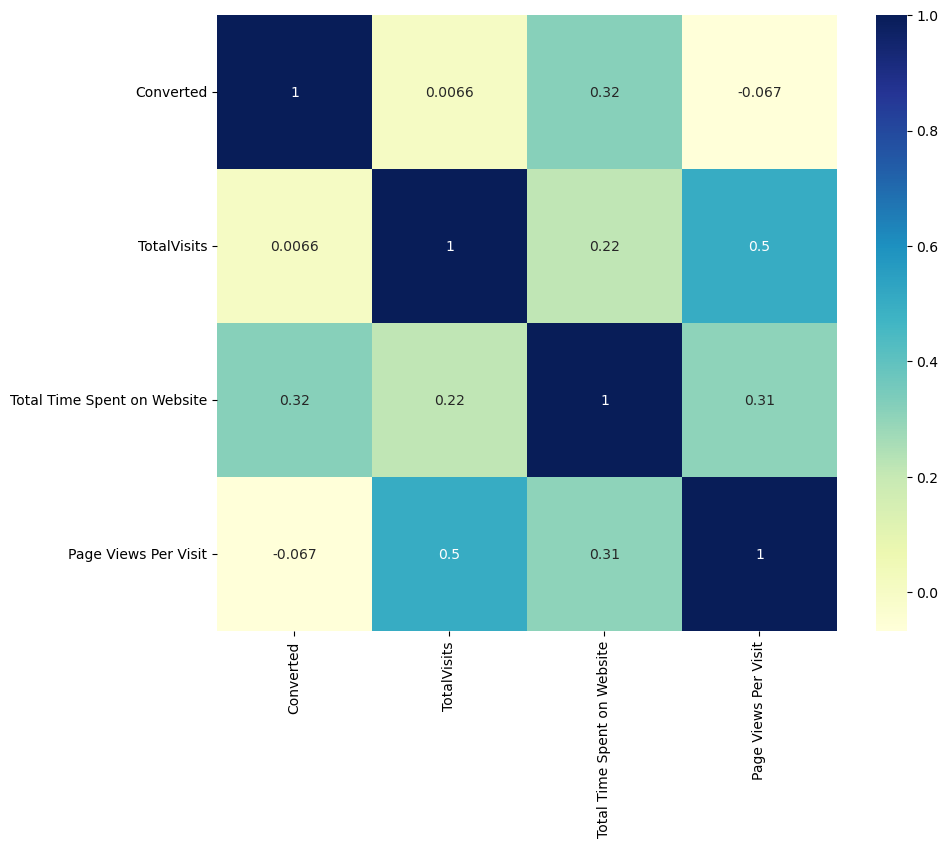

In [93]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(l1.corr(), cmap="YlGnBu", annot=True)
plt.show()


# Outlier Treatments of the Variables

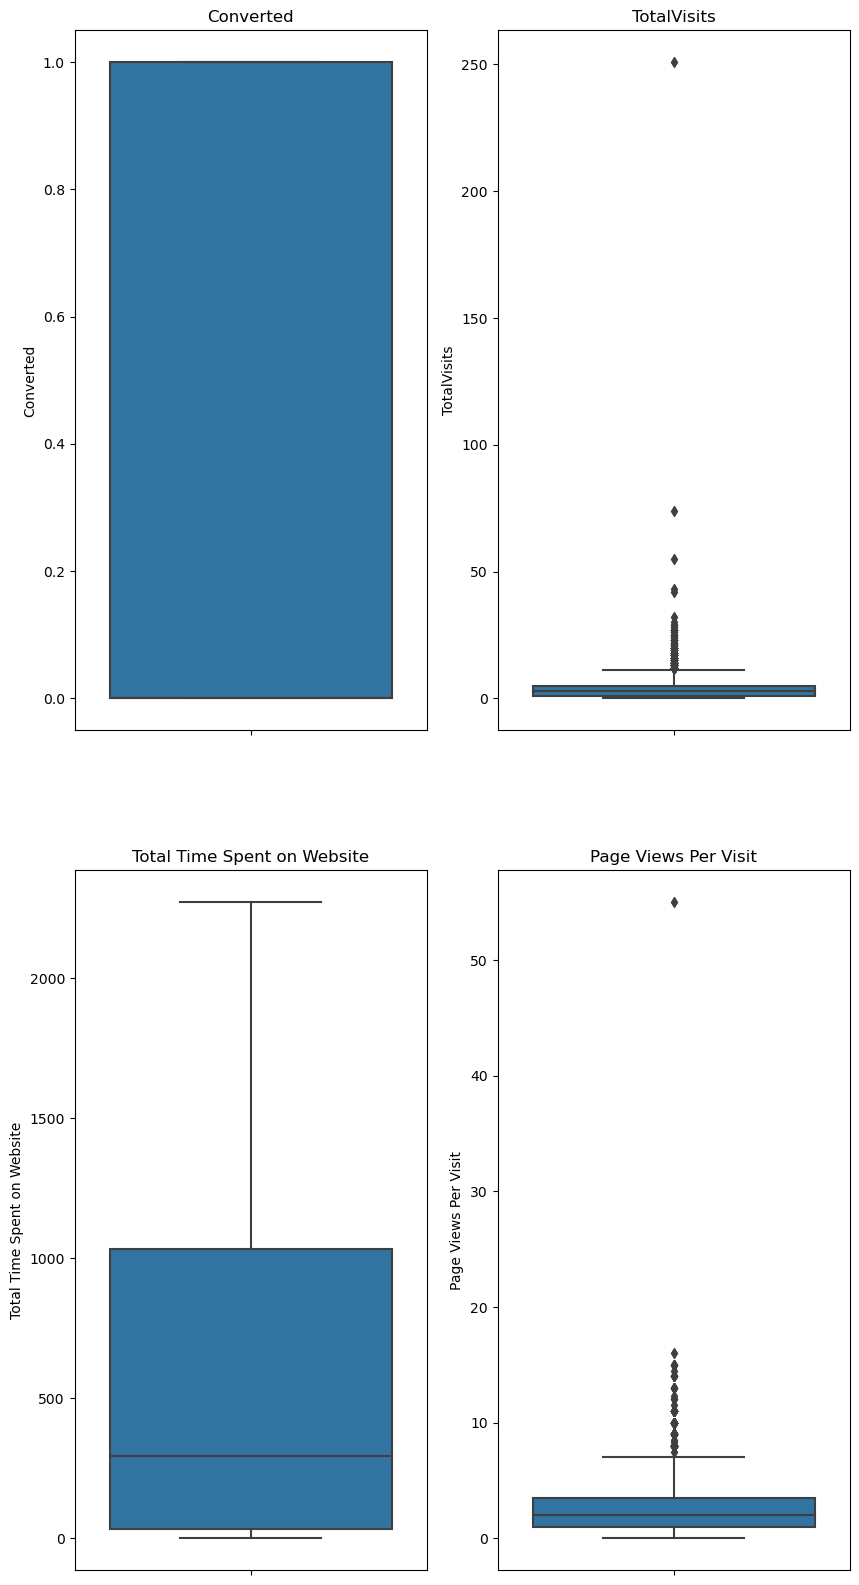

In [94]:
plt.figure(figsize=(10,20))

for m in enumerate(l1):
    plt.subplot(2,2,m[0]+1)
    sns.boxplot(y=df1[m[1]])
    plt.title(m[1])

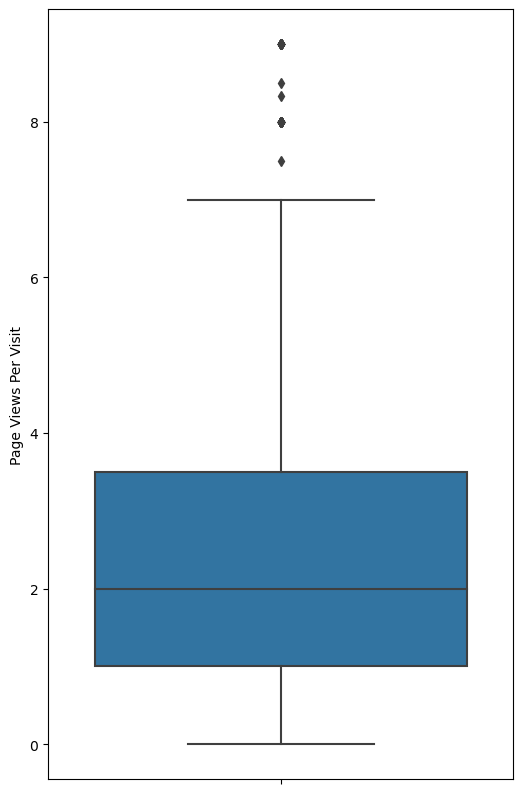

In [95]:
df1['Page Views Per Visit'].describe()
plt.figure(figsize=(6,10))
Q99 = df1['Page Views Per Visit'].quantile(0.99)
df1 = df1[df1['Page Views Per Visit'] <= Q99]
Q1 = df1['Page Views Per Visit'].quantile(0.01)
df1 = df1[df1['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df1['Page Views Per Visit'])
plt.show()

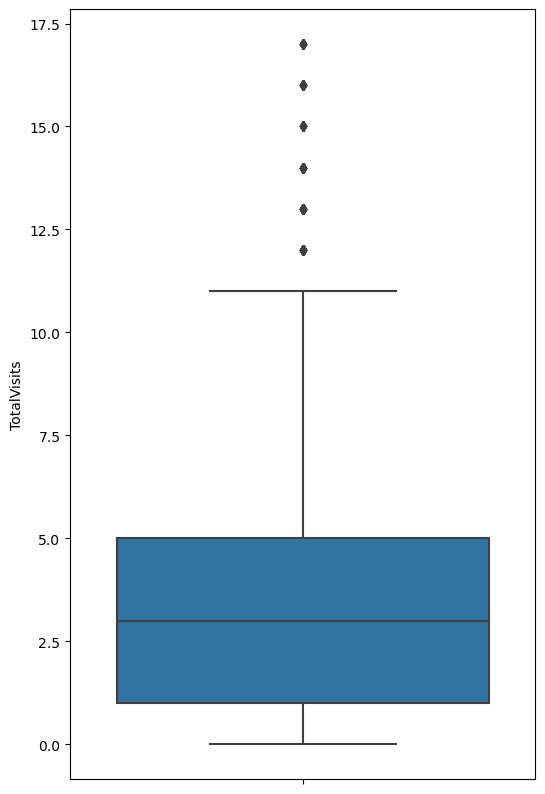

In [96]:
plt.figure(figsize=(6,10))
Q99 = df1['TotalVisits'].quantile(0.99)
df1 = df1[df1['TotalVisits'] <= Q99]
Q1 = df1['TotalVisits'].quantile(0.01)
df1 = df1[df1['TotalVisits'] >= Q1]
sns.boxplot(y=df1['TotalVisits'])
plt.show()

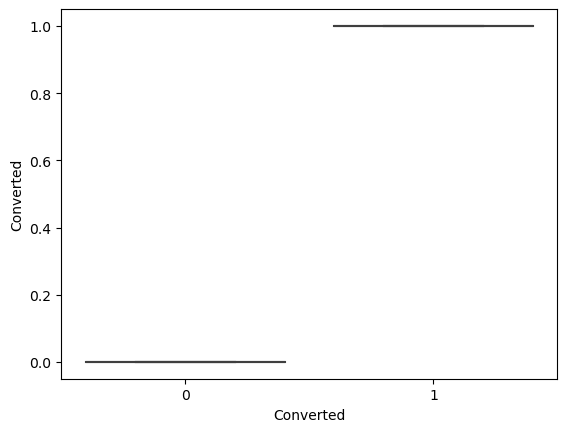

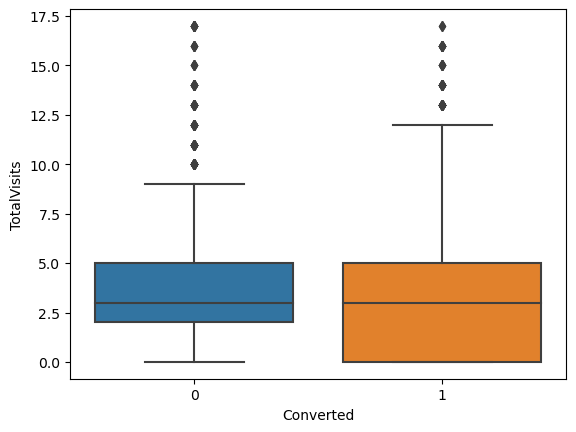

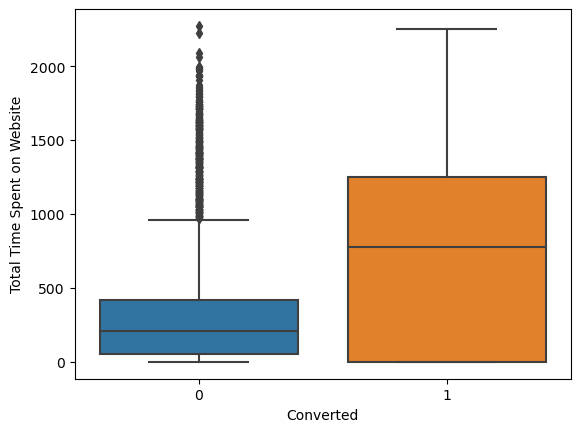

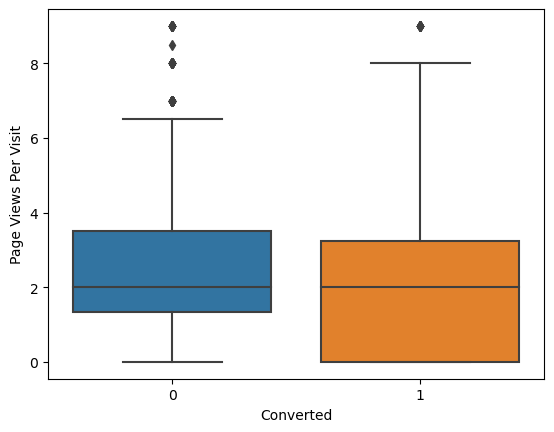

In [97]:
#Outlier treatment is done for both the columns Total Visits and the Pages Views per Visits and the other two numerical columns doesnt have any outliers when scaled on boxplot.
for i in l1:
    sns.boxplot(x=df1.Converted,y=i, data=l1)
    plt.show()

# Visualising the Categorical Variables

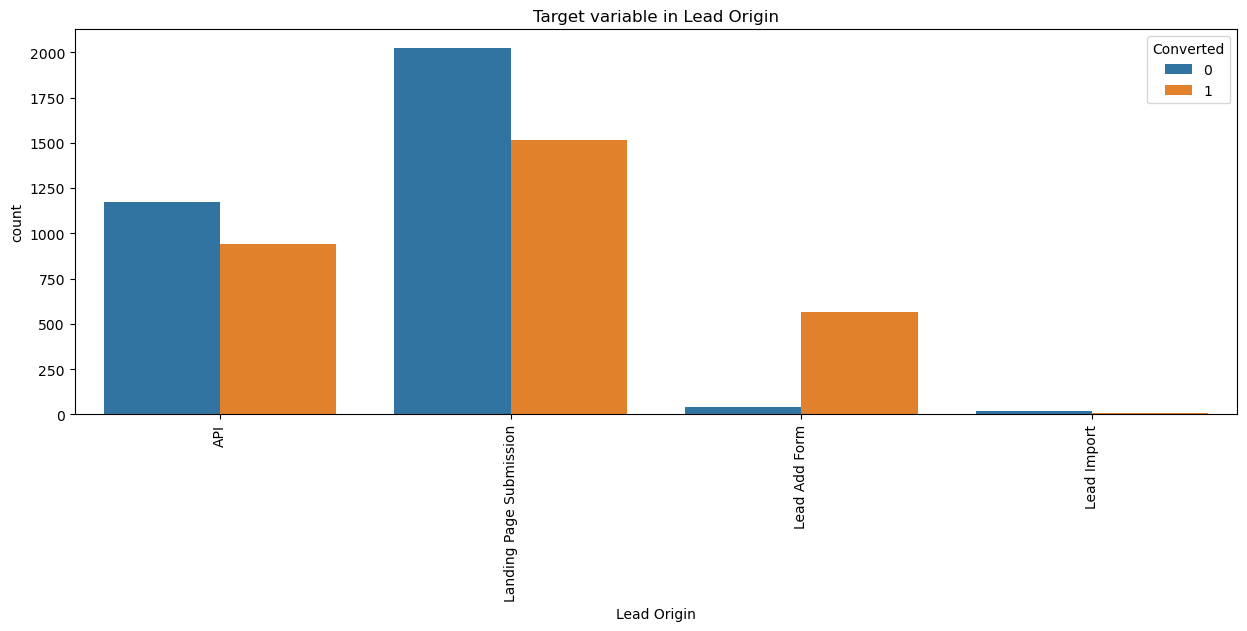

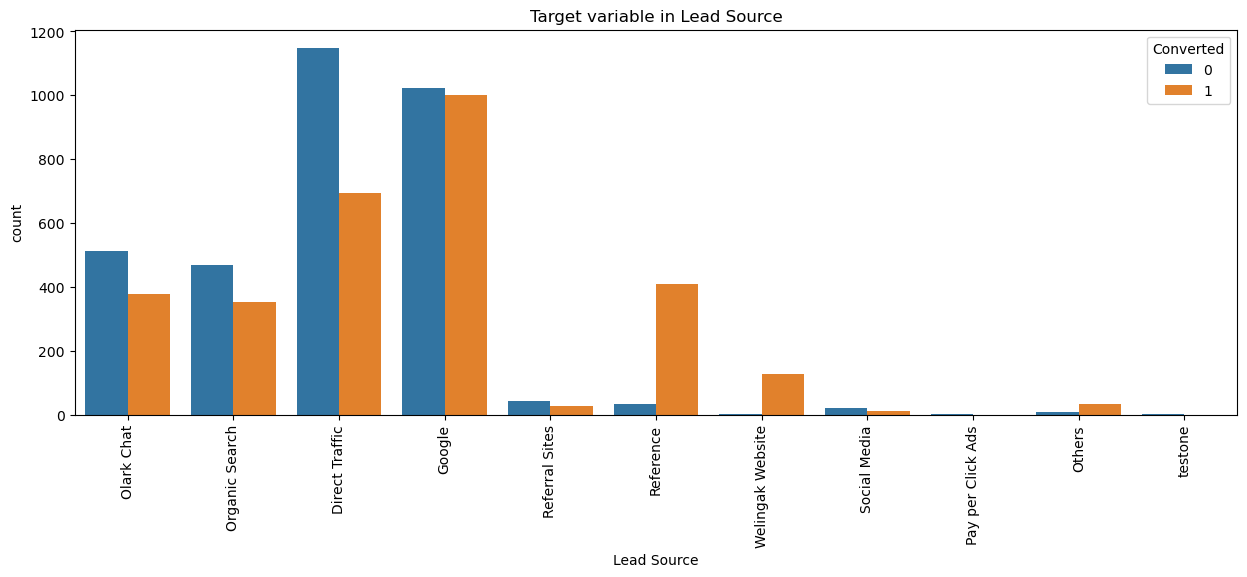

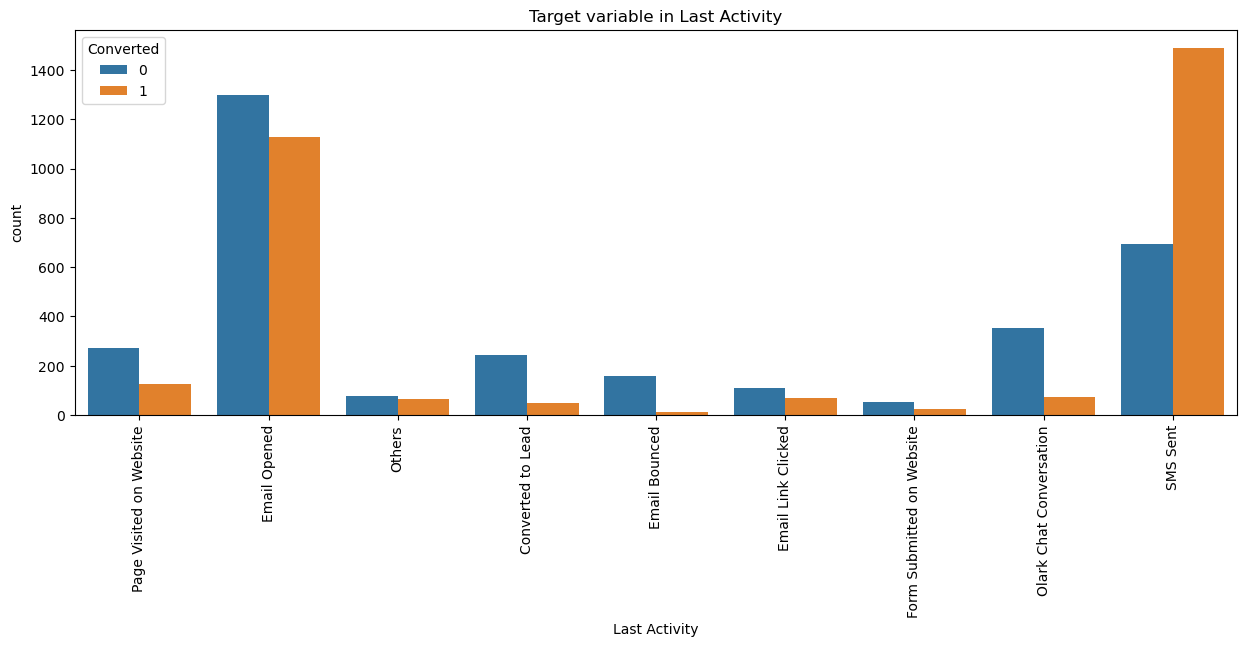

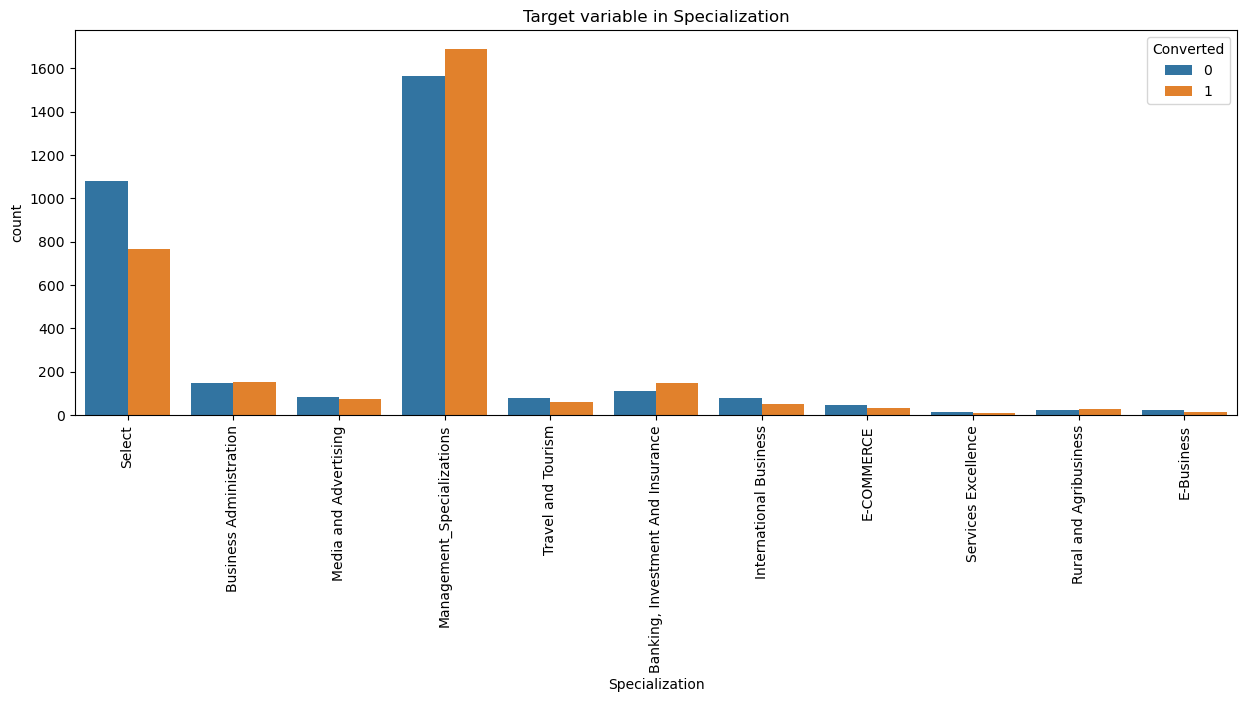

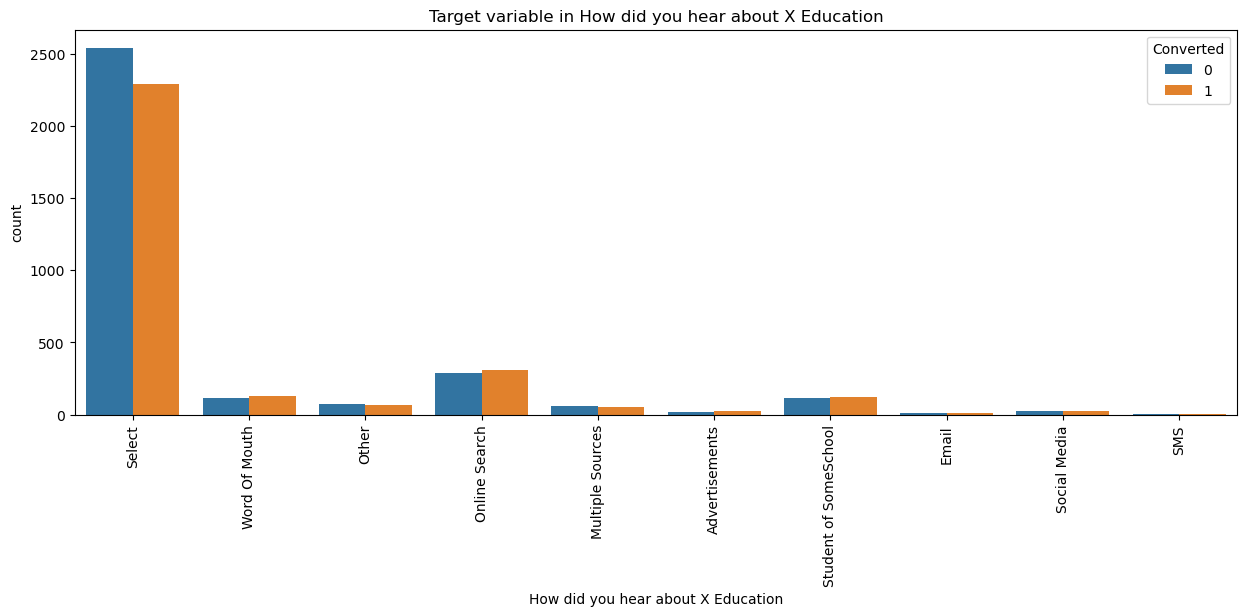

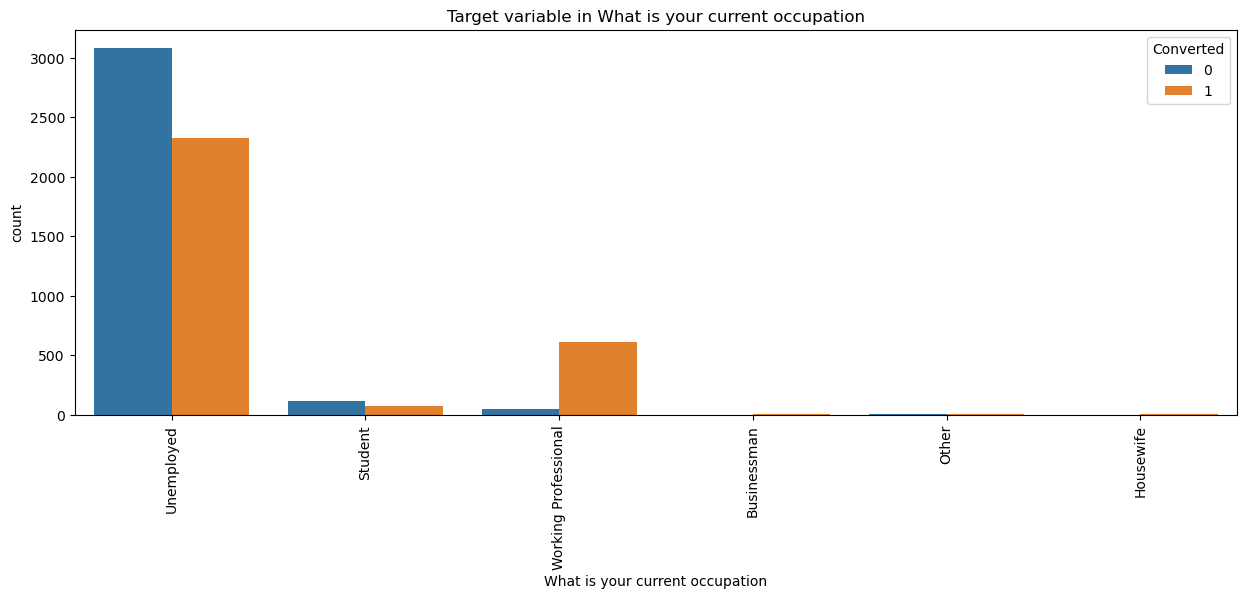

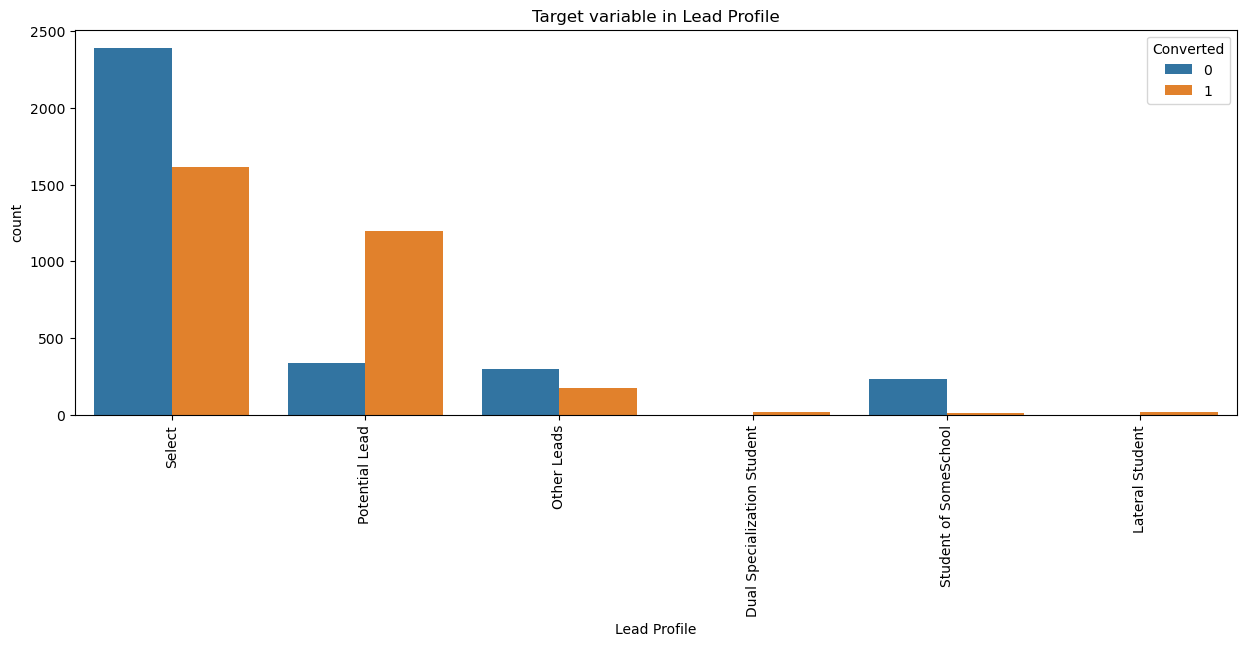

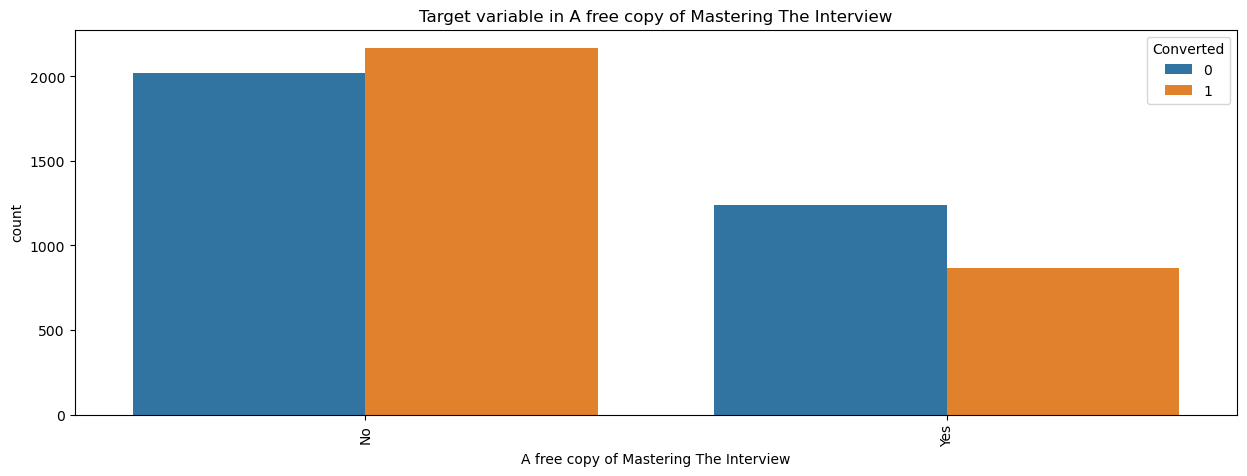

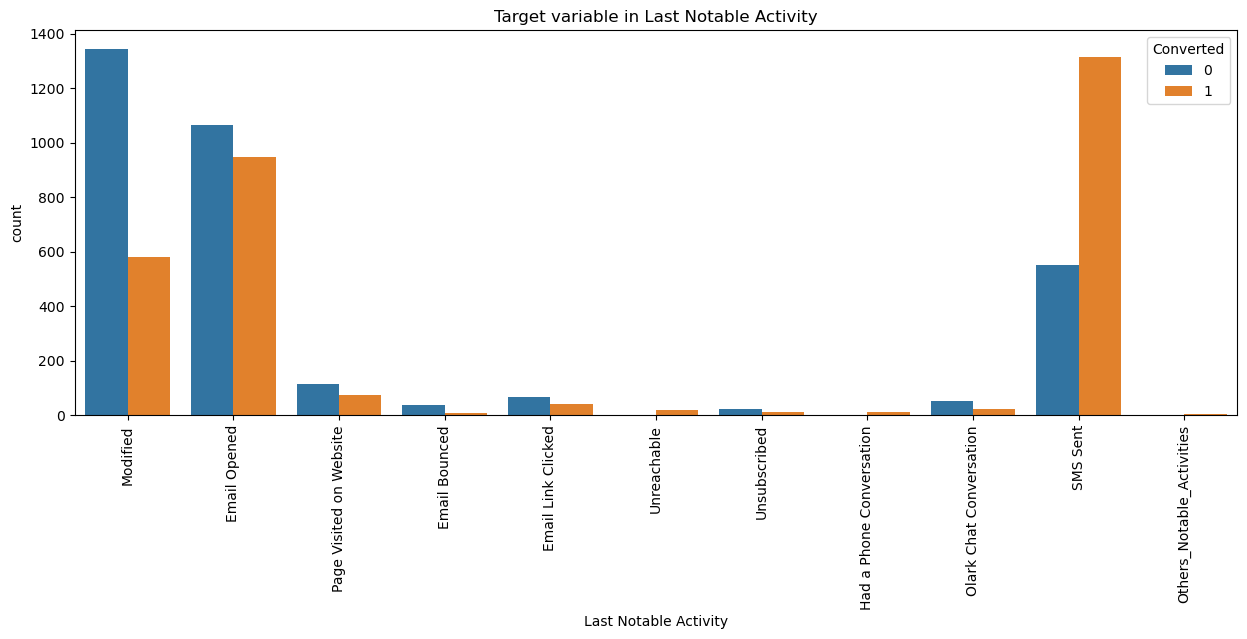

In [98]:
conv = df1.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(x=df1[i], hue=df1.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

* **The Insights from the visualisation of the categorical variables are ** :
People who are not ordering a free copy of the book seems to be converting more than the ones dropping as observed

*People who are identified as Potential leads and followed up seems to be converting as a customer to the website

*Working Professionals seem to be in the higher conversion ratio compared to the other categories of the people

*People who have looked upon online for the website adn those who are a student of Some School seems to show more interest in logging in for the course.

*People who have interacted with a SMS being sent in showing an interest seems to be enrolling more in the courses
They have a higher conversion ratio.

*People who have been referred have a higher chance of converting into a customer

In [99]:


df1= df1.drop(columns=['Lead Number'],axis=1)

In [100]:
df1

Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9234  Landing Page Submission  Direct Traffic          1          5.0   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9234                          210                  2.50   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9239                         1279                  3.00   

                Last Activity              Specialization  \
0     Page Visited on Website                      Select   
1                Email Opened                      Select   
2                Email Opened     Business Administration   
3                      Others       Media and Advertising   
4           Converted to Lead                      Select   
...                       ...                         ...   
9234                 SMS Sent     Business Administration   
9235                   Others  Management_Specializations   
9236                 SMS Sent       Media and Advertising   
9237                 SMS Sent     Business Administration   
9239                 SMS Sent  Management_Specializations   

     How did you hear about X Education What is your current occupation  \
0                                Select                      Unemployed   
1                                Select                      Unemployed   
2                                Select                         Student   
3                         Word Of Mouth                      Unemployed   
4                                 Other                      Unemployed   
...                                 ...                             ...   
9234                             Select                      Unemployed   
9235                             Select                      Unemployed   
9236                             Select                      Unemployed   
9237                             Select                      Unemployed   
9239                             Select                      Unemployed   

        Lead Profile A free copy of Mastering The Interview  \
0             Select                                     No   
1             Select                                     No   
2     Potential Lead                                    Yes   
3             Select                                     No   
4             Select                                     No   
...              ...                                    ...   
9234  Potential Lead                                     No   
9235  Potential Lead                                     No   
9236  Potential Lead                                    Yes   
9237  Potential Lead                                    Yes   
9239  Potential Lead                                    Yes   

          Last Notable Activity  
0      

# Creating Dummy Variables


#### Splitting some categorical variables into dummy variables

In [101]:
#Categorical Variables
cat_cols= df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [102]:
#A free copy of Mastering The Interview
varlist =  ['A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [103]:
df1[varlist]=df1[varlist].apply(binary_map)

In [104]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [105]:
df1['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Email Opened                 2011
Modified                     1925
SMS Sent                     1864
Page Visited on Website       190
Email Link Clicked            108
Olark Chat Conversation        75
Email Bounced                  48
Unsubscribed                   32
Unreachable                    22
Had a Phone Conversation       12
Others_Notable_Activities       5
Name: count, dtype: int64

In [106]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [107]:
dummy = pd.get_dummies(df1['Lead Origin'],prefix='L_Origin',drop_first=True)
df1 = pd.concat([df1, dummy], axis = 1)

In [108]:
dummy = pd.get_dummies(df1['Lead Source'], prefix  = 'L_Source')
dummy = dummy.drop(['L_Source_Others'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [109]:
dummy = pd.get_dummies(df1['Last Activity'], prefix  = 'LAct')
dummy = dummy.drop(['LAct_Others'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(df1['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Select'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [111]:
dummy = pd.get_dummies(df1['How did you hear about X Education'], prefix  = 'Heard_Source')
dummy = dummy.drop(['Heard_Source_Other','Heard_Source_Select'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [112]:

dummy = pd.get_dummies(df1['What is your current occupation'], prefix  = 'Occupation')
dummy = dummy.drop(['Occupation_Other'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [113]:

dummy = pd.get_dummies(df1['Lead Profile'], prefix  = 'Lead Profile')
dummy = dummy.drop(['Lead Profile_Select'],axis= 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [114]:
dummy = pd.get_dummies(df1['Last Notable Activity'], prefix  = 'N_Act')
df1 = pd.concat([df1, dummy], axis = 1)

In [115]:
df1=df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile','Last Notable Activity'],axis=1)

In [116]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [117]:
df1.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  L_Origin_Landing Page Submission  \
0                                       0                             False   
1                                       0                             False   
2                                       1                              True   
3                                       0                              True   
4                                       0                              True   

   L_Origin_Lead Add Form  L_Origin_Lead Import  L_Source_Direct Traffic  \
0                   False                 False                    False   
1                   False                 False                    False   
2                   False                 False                     True   
3                   False                 False                     True   
4                   False                 False                    False   

   L_Source_Google  L_Source_Olark Chat  L_Source_Organic Search  \
0            False                 True                    False   
1            False                False                     True   
2            False                False                    False   
3            False                False                    False   
4             True                False                    False   

   L_Source_Pay per Click Ads  L_Source_Reference  L_Source_Referral Sites  \
0                       False               False                    False   
1                       False               False                    False   
2                       False               False                    False   
3                       False               False                    False   
4                       False               False                    False   

   L_Source_Social Media  L_Source_Welingak Website  L_Source_testone  \
0                  False                      False             False   
1                  False                      False             False   
2                  False                      False             False   
3                  False                      False             False   
4                  False                      False             False   

   LAct_Converted to Lead  LAct_Email Bounced  LAct_Email Link Clicked  \
0                   False               False                    False   
1                   False               False                    False   
2                   False               False                    False   
3                   False               False                    False   
4                    True               False                    False   

   LAct_Email Opened  LAct_Form Submitted on Website  \
0              False                           False   
1               True                           False   
2               True                           False   
3              False                           False   
4              False                           False   

   LAct_Olark Chat Conversation  LAct_Page Visited on Website  LAct_SMS Sent  \
0                         False                          True          False   
1                         False                         False          False   
2                         False                         False          False   
3                         False                         False          False   
4                         False                         False          False   

   Special

#### Since some of the columns have a True or False value , we will convert them into the integer type which will give us a 1 for True and 0 for False

In [118]:
df1[['L_Origin_Landing Page Submission', 'L_Origin_Lead Add Form',
       'L_Origin_Lead Import', 'L_Source_Direct Traffic', 'L_Source_Google',
       'L_Source_Olark Chat', 'L_Source_Organic Search',
       'L_Source_Pay per Click Ads', 'L_Source_Reference',
       'L_Source_Referral Sites', 'L_Source_Social Media',
       'L_Source_Welingak Website', 'L_Source_testone',
       'LAct_Converted to Lead', 'LAct_Email Bounced',
       'LAct_Email Link Clicked', 'LAct_Email Opened',
       'LAct_Form Submitted on Website', 'LAct_Olark Chat Conversation',
       'LAct_Page Visited on Website', 'LAct_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Heard_Source_Advertisements',
       'Heard_Source_Email', 'Heard_Source_Multiple Sources',
       'Heard_Source_Online Search', 'Heard_Source_SMS',
       'Heard_Source_Social Media', 'Heard_Source_Student of SomeSchool',
       'Heard_Source_Word Of Mouth', 'Occupation_Businessman',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'N_Act_Email Bounced', 'N_Act_Email Link Clicked', 'N_Act_Email Opened',
       'N_Act_Had a Phone Conversation', 'N_Act_Modified',
       'N_Act_Olark Chat Conversation', 'N_Act_Others_Notable_Activities',
       'N_Act_Page Visited on Website', 'N_Act_SMS Sent', 'N_Act_Unreachable',
       'N_Act_Unsubscribed']]=df1[['L_Origin_Landing Page Submission', 'L_Origin_Lead Add Form',
       'L_Origin_Lead Import', 'L_Source_Direct Traffic', 'L_Source_Google',
       'L_Source_Olark Chat', 'L_Source_Organic Search',
       'L_Source_Pay per Click Ads', 'L_Source_Reference',
       'L_Source_Referral Sites', 'L_Source_Social Media',
       'L_Source_Welingak Website', 'L_Source_testone',
       'LAct_Converted to Lead', 'LAct_Email Bounced',
       'LAct_Email Link Clicked', 'LAct_Email Opened',
       'LAct_Form Submitted on Website', 'LAct_Olark Chat Conversation',
       'LAct_Page Visited on Website', 'LAct_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Heard_Source_Advertisements',
       'Heard_Source_Email', 'Heard_Source_Multiple Sources',
       'Heard_Source_Online Search', 'Heard_Source_SMS',
       'Heard_Source_Social Media', 'Heard_Source_Student of SomeSchool',
       'Heard_Source_Word Of Mouth', 'Occupation_Businessman',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'N_Act_Email Bounced', 'N_Act_Email Link Clicked', 'N_Act_Email Opened',
       'N_Act_Had a Phone Conversation', 'N_Act_Modified',
       'N_Act_Olark Chat Conversation', 'N_Act_Others_Notable_Activities',
       'N_Act_Page Visited on Website', 'N_Act_SMS Sent', 'N_Act_Unreachable',
       'N_Act_Unsubscribed']].astype(int)

# Test-Train Split :Logistic Regression

In [119]:
X= df1.drop(['Converted'],axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  L_Origin_Landing Page Submission  \
0                                       0                                 0   
1                                       0                                 0   
2                                       1                                 1   
3                                       0                                 1   
4                                       0                                 1   

   L_Origin_Lead Add Form  L_Origin_Lead Import  L_Source_Direct Traffic  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        1   
3                       0                     0                        1   
4                       0                     0                        0   

   L_Source_Google  L_Source_Olark Chat  L_Source_Organic Search  \
0                0                    1                        0   
1                0                    0                        1   
2                0                    0                        0   
3                0                    0                        0   
4                1                    0                        0   

   L_Source_Pay per Click Ads  L_Source_Reference  L_Source_Referral Sites  \
0                           0                   0                        0   
1                           0                   0                        0   
2                           0                   0                        0   
3                           0                   0                        0   
4                           0                   0                        0   

   L_Source_Social Media  L_Source_Welingak Website  L_Source_testone  \
0                      0                          0                 0   
1                      0                          0                 0   
2                      0                          0                 0   
3                      0                          0                 0   
4                      0                          0                 0   

   LAct_Converted to Lead  LAct_Email Bounced  LAct_Email Link Clicked  \
0                       0                   0                        0   
1                       0                   0                        0   
2                       0                   0                        0   
3                       0                   0                        0   
4                       1                   0                        0   

   LAct_Email Opened  LAct_Form Submitted on Website  \
0                  0                               0   
1                  1                               0   
2                  1                               0   
3                  0                               0   
4                  0                               0   

   LAct_Olark Chat Conversation  LAct_Page Visited on Website  LAct_SMS Sent  \
0                             0                             1              0   
1                             0                             0              0   
2                             0                             0              0   
3                             0                             0              0   
4                             0                             0              0   

   Specialization_Banking, Investment And Insurance  \
0                    

In [120]:
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [121]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [122]:

#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4404, 64)
y_train Size (4404,)


In [123]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8321    -1.127146                    -0.936479             -1.261670   
1612    -0.090037                     1.661471              0.327204   
6159    -0.090037                    -0.872376              0.327204   
8384    -1.127146                    -0.936479             -1.261670   
5291    -0.090037                     1.355201             -0.467233   

      A free copy of Mastering The Interview  \
8321                               -0.713620   
1612                               -0.713620   
6159                                1.401307   
8384                               -0.713620   
5291                               -0.713620   

      L_Origin_Landing Page Submission  L_Origin_Lead Add Form  \
8321                                 0                       0   
1612                                 1                       0   
6159                                 1                       0   
8384                                 0                       0   
5291                                 0                       0   

      L_Origin_Lead Import  L_Source_Direct Traffic  L_Source_Google  \
8321                     0                        0                0   
1612                     0                        0                1   
6159                     0                        0                0   
8384                     0                        0                0   
5291                     0                        0                1   

      L_Source_Olark Chat  L_Source_Organic Search  \
8321                    1                        0   
1612                    0                        0   
6159                    0                        1   
8384                    1                        0   
5291                    0                        0   

      L_Source_Pay per Click Ads  L_Source_Reference  L_Source_Referral Sites  \
8321                           0                   0                        0   
1612                           0                   0                        0   
6159                           0                   0                        0   
8384                           0                   0                        0   
5291                           0                   0                        0   

      L_Source_Social Media  L_Source_Welingak Website  L_Source_testone  \
8321                      0                          0                 0   
1612                      0                          0                 0   
6159                      0                          0                 0   
8384                      0                          0                 0   
5291                      0                          0                 0   

      LAct_Converted to Lead  LAct_Email Bounced  LAct_Email Link Clicked  \
8321                       0                   0                        0   
1612                       0                   0                        0   
6159                       0                   0                        0   
8384                       0                   0                        0   
5291                       0                   0                        0   

      LAct_Email Opened  LAct_Form Submitted on Website  \
8321                  0                               0   
1612                  0                               0   
6159                  1                               0   
8384                  0                               0   
5291                  0                               0   

      LAct_Olark Chat Conversation  LAct_Page Visited on Website  \
8321                             0                             0   
1612                             0                             0   
6159                             0                             0   
8384                             0                             0   
5291                       

## Correlation

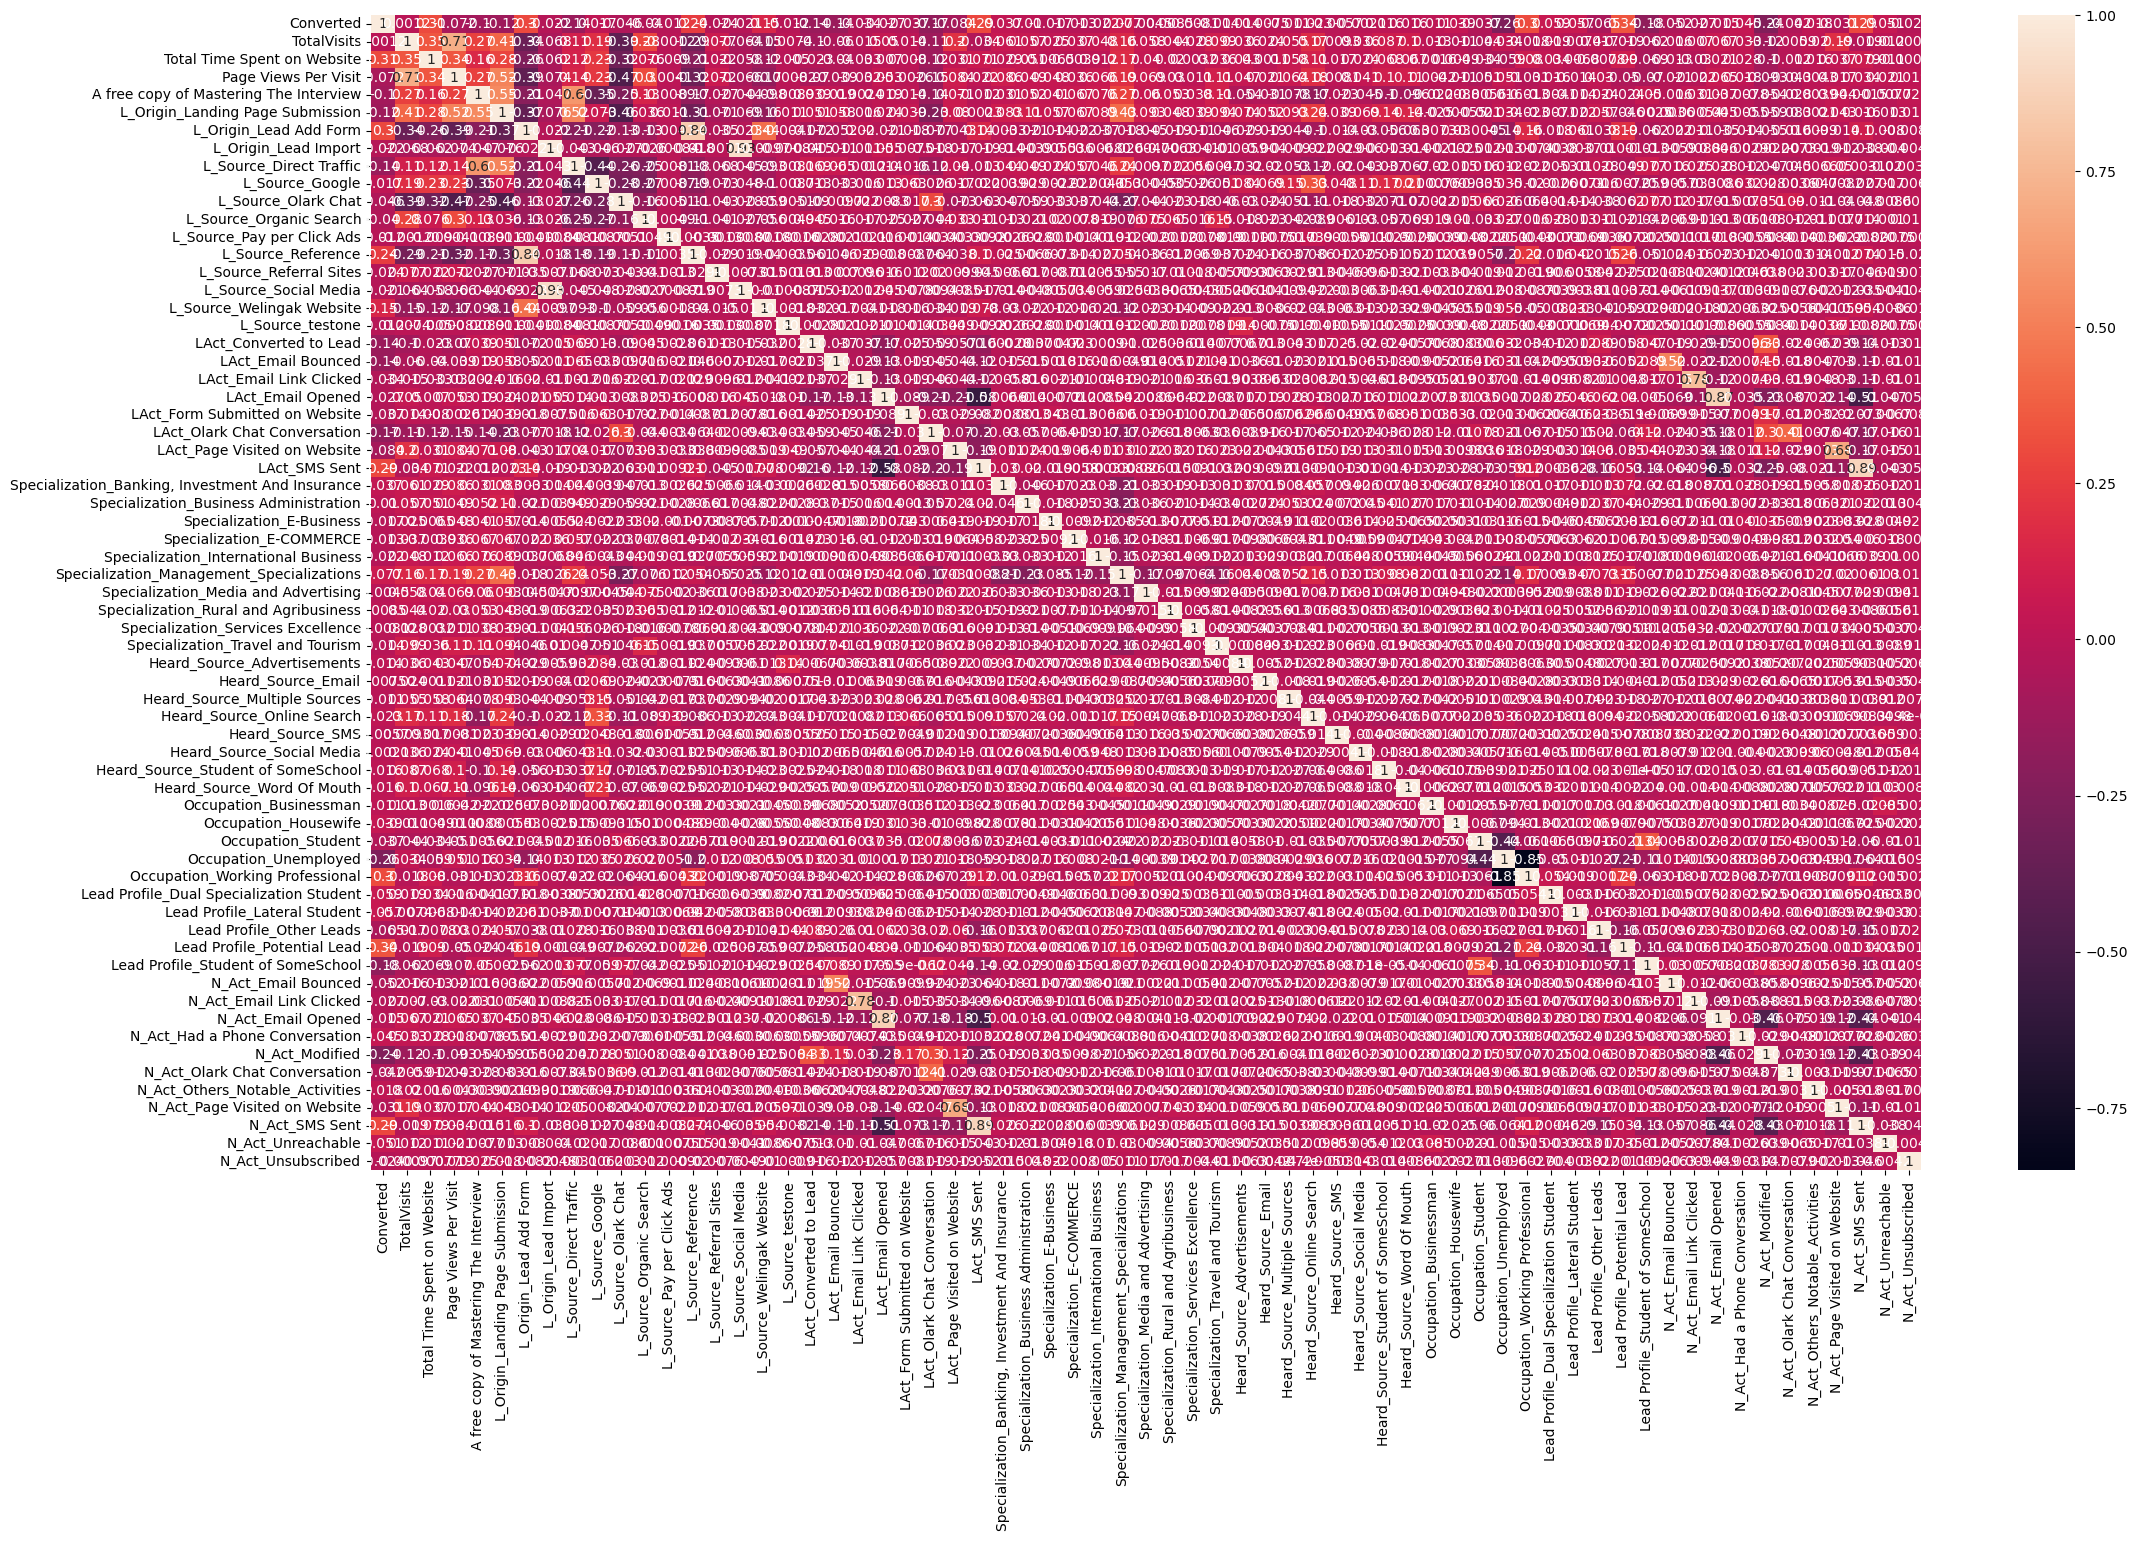

In [124]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [125]:
correlation_matrix = df1.corr()

pd.set_option('display.max_rows', 66)
pd.set_option('display.max_columns', 66)
correlation_matrix

Converted  TotalVisits  \
Converted                                          1.000000     0.001187   
TotalVisits                                        0.001187     1.000000   
Total Time Spent on Website                        0.306244     0.346998   
Page Views Per Visit                              -0.071705     0.707583   
A free copy of Mastering The Interview            -0.099836     0.265164   
L_Origin_Landing Page Submission                  -0.122771     0.413963   
L_Origin_Lead Add Form                             0.296592    -0.339106   
L_Origin_Lead Import                              -0.021511    -0.068467   
L_Source_Direct Traffic                           -0.135372     0.105957   
L_Source_Google                                    0.017392     0.187907   
L_Source_Olark Chat                               -0.045779    -0.389280   
L_Source_Organic Search                           -0.040496     0.284563   
L_Source_Pay per Click Ads                        -0.012167    -0.001245   
L_Source_Reference                                 0.243769    -0.286636   
L_Source_Referral Sites                           -0.023513     0.077337   
L_Source_Social Media                             -0.020621    -0.064252   
L_Source_Welingak Website                          0.145433    -0.151544   
L_Source_testone                                  -0.012167     0.007351   
LAct_Converted to Lead                            -0.140313    -0.103947   
LAct_Email Bounced                                -0.135030    -0.059680   
LAct_Email Link Clicked                           -0.034464    -0.014784   
LAct_Email Opened                                 -0.027353     0.050064   
LAct_Form Submitted on Website                    -0.037403     0.013678   
LAct_Olark Chat Conversation                      -0.167622    -0.114574   
LAct_Page Visited on Website                      -0.084290     0.198765   
LAct_SMS Sent                                      0.290909    -0.033633   
Specialization_Banking, Investment And Insurance   0.037080     0.061462   
Specialization_Business Administration             0.010241     0.057245   
Specialization_E-Business                         -0.016610     0.025172   
Specialization_E-COMMERCE                         -0.013256     0.036920   
Specialization_International Business             -0.022405     0.048010   
Specialization_Management_Specializations          0.077298     0.161218   
Specialization_Media and Advertising              -0.004547     0.058119   
Specialization_Rural and Agribusiness              0.008471     0.044273   
Specialization_Services Excellence                -0.008115     0.028167   
Specialization_Travel and Tourism                 -0.014034     0.098604   
Heard_Source_Advertisements                        0.014090     0.036174   
Heard_Source_Email                                 0.007499     0.023521   
Heard_Source_Multiple Sources                     -0.010750     0.054774   
Heard_Source_Online Search                         0.022918     0.170075   
Heard_Source_SMS                                  -0.005733     0.009342   
Heard_Source_Social Media                         -0.002101     0.036390   
Heard_Source_Student of SomeSchool                 0.016236     0.087459   
Heard_Source_Word Of Mouth                         0.016209     0.101950   
Occupation_Businessman                             0.011405     0.012747   
Occupation_Housewife                               0.039220    -0.010906   
Occupation_Student                                -0.037264    -0.044003   
Occupation_Unemployed                             -0.255334     0.034418   
Occupation_Working Professional                    0.302806    -0.017839   
Lead Profile_Dual Specialization Student           0.058517     0.019448   
Lead Profile_Lateral Student                       0.057030    -0.007411   
Lead Profile_Other Leads                          -0.065237     0.016840   
Lead Profile_Potential

# Model Building

* We have many variables in the test-train dataset which we cannot handle to deal with. SO we will be running a logistic regression identifier to identify the top 15 variables that can be taken into consideration

In [126]:
#Importing the logistic regression library

logreg = LogisticRegression()

In [127]:
rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train,y_train)

In [128]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 47),
 ('L_Origin_Landing Page Submission', False, 15),
 ('L_Origin_Lead Add Form', True, 1),
 ('L_Origin_Lead Import', False, 35),
 ('L_Source_Direct Traffic', True, 1),
 ('L_Source_Google', False, 2),
 ('L_Source_Olark Chat', False, 10),
 ('L_Source_Organic Search', True, 1),
 ('L_Source_Pay per Click Ads', False, 29),
 ('L_Source_Reference', False, 45),
 ('L_Source_Referral Sites', True, 1),
 ('L_Source_Social Media', False, 44),
 ('L_Source_Welingak Website', True, 1),
 ('L_Source_testone', False, 25),
 ('LAct_Converted to Lead', False, 11),
 ('LAct_Email Bounced', True, 1),
 ('LAct_Email Link Clicked', False, 43),
 ('LAct_Email Opened', False, 26),
 ('LAct_Form Submitted on Website', False, 21),
 ('LAct_Olark Chat Conversation', False, 6),
 ('LAct_Page Visited on Website', False, 50),
 ('LAct_SMS Sent', True, 1),
 ('Specia

In [129]:
#Putting all the variables selected by the RFE in the variable coll

coll = X_train.columns[rfe.support_]

In [232]:
coll

Index(['L_Origin_Lead Add Form', 'L_Source_Direct Traffic',
       'L_Source_Organic Search', 'L_Source_Referral Sites',
       'L_Source_Welingak Website', 'LAct_Email Bounced', 'LAct_SMS Sent',
       'Occupation_Housewife', 'Occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'N_Act_Had a Phone Conversation',
       'N_Act_Unreachable'],
      dtype='object')

In [130]:
#Selecting only the models selected by RFE
X_train = X_train[coll]

## Model Building

* We will be building the models and seeing which feature variable to eliminate unless we have a proper model to execute to create a train-test set.


## MODEL 1

In [131]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4388
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2214.8
Date:                Tue, 17 Oct 2023   Deviance:                       4429.7
Time:                        16:34:57   Pearson chi2:                 4.49e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3157
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9302      0.061    -15.162      0.000      -1.050      -0.810
L_Origin_Lead Add Form                       1.9461      0.225      8.663      0.000       1.506       2.386
L_Source_Direct Traffic                     -0.4650      0.085     -5.489      0.000      -0.631      -0.299
L_Source_Organic Search                     -0.3114      0.110     -2.822      0.005      -0.528      -0.095
L_Source_Referral Sites                     -0.4913      0.366     -1.343      0.179      -1.208       0.226
L_Source_Welingak Website                    2.0584      0.763      2.698      0.007       0.563       3.554
LAct_Email Bounced                          -1.9946      0.437     -4.561      0.000      -2.852      -1.137
LAct_SMS Sent                                1.2262      0.077     15.836      0.000       1.074       1.378
Occupation_Housewife                        24.5221   4.72e+04      0.001      1.000   -9.24e+04    9.25e+04
Occupation_Working Professional              2.5032      0.191     13.110      0.000       2.129       2.877
Lead Profile_Dual Specialization Student    24.5725   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
Lead Profile_Lateral Student                24.5849   3.23e+04      0.001      0.999   -6.32e+04    6.33e+04
Lead Profile_Potential Lead                  1.4768      0.091     16.141      0.000       1.297       1.656
Lead Profile_Student of SomeSchool          -2.3150      0.462     -5.010      0.000      -3.221      -1.409
N_Act_Had a Phone Conversation              24.5050   4.27e+04      0.001      1.000   -8.37e+04    8.37e+04
N_Act_Unreachable                            2.0246      0.811      2.496      0.013       0.435       3.614
============================================================================================================
"""

* Since the variables'  p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

## Checking the VIF

In [132]:
# Importing the 'variance_inflation_factor' library


In [133]:
vif= pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

Features   VIF
0                     L_Origin_Lead Add Form  1.56
6                              LAct_SMS Sent  1.40
11               Lead Profile_Potential Lead  1.37
4                  L_Source_Welingak Website  1.29
1                    L_Source_Direct Traffic  1.25
8            Occupation_Working Professional  1.24
2                    L_Source_Organic Search  1.10
5                         LAct_Email Bounced  1.05
12        Lead Profile_Student of SomeSchool  1.05
7                       Occupation_Housewife  1.01
9   Lead Profile_Dual Specialization Student  1.01
10              Lead Profile_Lateral Student  1.01
14                         N_Act_Unreachable  1.01
3                    L_Source_Referral Sites  1.00
13            N_Act_Had a Phone Conversation  1.00

* Since the VIF is lesser than 10 , we can go with either **Lead Profile_Dual Specialization Student or N_Act_Had a Phone Conversation or Lead Profile_Lateral Student**

In [134]:
X_train.drop('Lead Profile_Dual Specialization Student', axis = 1, inplace = True)

# Model 2

In [135]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4389
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2224.3
Date:                Tue, 17 Oct 2023   Deviance:                       4448.7
Time:                        16:34:57   Pearson chi2:                 4.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3127
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9193      0.061    -15.031      0.000      -1.039      -0.799
L_Origin_Lead Add Form                 1.9398      0.225      8.638      0.000       1.500       2.380
L_Source_Direct Traffic               -0.4659      0.085     -5.513      0.000      -0.632      -0.300
L_Source_Organic Search               -0.3017      0.110     -2.744      0.006      -0.517      -0.086
L_Source_Referral Sites               -0.5023      0.366     -1.372      0.170      -1.220       0.215
L_Source_Welingak Website              2.0581      0.763      2.697      0.007       0.563       3.554
LAct_Email Bounced                    -2.0081      0.438     -4.586      0.000      -2.866      -1.150
LAct_SMS Sent                          1.2189      0.077     15.775      0.000       1.067       1.370
Occupation_Housewife                  23.5120   2.87e+04      0.001      0.999   -5.62e+04    5.62e+04
Occupation_Working Professional        2.5400      0.191     13.331      0.000       2.167       2.913
Lead Profile_Lateral Student          23.5723   1.96e+04      0.001      0.999   -3.83e+04    3.84e+04
Lead Profile_Potential Lead            1.4657      0.091     16.034      0.000       1.287       1.645
Lead Profile_Student of SomeSchool    -2.3275      0.462     -5.035      0.000      -3.234      -1.421
N_Act_Had a Phone Conversation        23.4919   2.59e+04      0.001      0.999   -5.08e+04    5.08e+04
N_Act_Unreachable                      2.0157      0.811      2.485      0.013       0.426       3.605
======================================================================================================
"""

* We can observe that the few values have a p-value greater than 0.05. Hence we will also calculate the VIF and decide which factor to remove.

### Checking VIF

In [136]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               L_Origin_Lead Add Form  1.56
6                        LAct_SMS Sent  1.40
10         Lead Profile_Potential Lead  1.36
4            L_Source_Welingak Website  1.29
1              L_Source_Direct Traffic  1.25
8      Occupation_Working Professional  1.24
2              L_Source_Organic Search  1.10
5                   LAct_Email Bounced  1.05
11  Lead Profile_Student of SomeSchool  1.05
7                 Occupation_Housewife  1.01
9         Lead Profile_Lateral Student  1.01
13                   N_Act_Unreachable  1.01
3              L_Source_Referral Sites  1.00
12      N_Act_Had a Phone Conversation  1.00

* Dropping the **Occupation Housewife** feature variable,as it has a p-value which is very high.

In [137]:
X_train.drop('Occupation_Housewife', axis = 1, inplace = True)

### MODEL 3

In [138]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4390
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2228.2
Date:                Tue, 17 Oct 2023   Deviance:                       4456.4
Time:                        16:34:58   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3115
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9142      0.061    -14.969      0.000      -1.034      -0.794
L_Origin_Lead Add Form                 1.9658      0.224      8.764      0.000       1.526       2.405
L_Source_Direct Traffic               -0.4681      0.084     -5.541      0.000      -0.634      -0.303
L_Source_Organic Search               -0.2967      0.110     -2.703      0.007      -0.512      -0.082
L_Source_Referral Sites               -0.5058      0.366     -1.382      0.167      -1.223       0.212
L_Source_Welingak Website              2.0295      0.763      2.660      0.008       0.534       3.525
LAct_Email Bounced                    -2.0121      0.438     -4.596      0.000      -2.870      -1.154
LAct_SMS Sent                          1.2134      0.077     15.715      0.000       1.062       1.365
Occupation_Working Professional        2.5364      0.191     13.313      0.000       2.163       2.910
Lead Profile_Lateral Student          23.5660   1.96e+04      0.001      0.999   -3.83e+04    3.83e+04
Lead Profile_Potential Lead            1.4641      0.091     16.028      0.000       1.285       1.643
Lead Profile_Student of SomeSchool    -2.3318      0.462     -5.044      0.000      -3.238      -1.426
N_Act_Had a Phone Conversation        23.4862   2.59e+04      0.001      0.999   -5.08e+04    5.08e+04
N_Act_Unreachable                      2.0118      0.811      2.481      0.013       0.422       3.601
======================================================================================================
"""

In [139]:
X_train.drop('N_Act_Had a Phone Conversation', axis = 1, inplace = True)

# Model 4

In [140]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4391
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2233.2
Date:                Tue, 17 Oct 2023   Deviance:                       4466.4
Time:                        16:34:58   Pearson chi2:                 4.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3100
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9074      0.061    -14.885      0.000      -1.027      -0.788
L_Origin_Lead Add Form                 1.9591      0.224      8.735      0.000       1.519       2.399
L_Source_Direct Traffic               -0.4728      0.084     -5.602      0.000      -0.638      -0.307
L_Source_Organic Search               -0.2951      0.110     -2.692      0.007      -0.510      -0.080
L_Source_Referral Sites               -0.5132      0.366     -1.402      0.161      -1.231       0.205
L_Source_Welingak Website              2.0323      0.763      2.664      0.008       0.537       3.528
LAct_Email Bounced                    -2.0200      0.438     -4.611      0.000      -2.879      -1.161
LAct_SMS Sent                          1.2072      0.077     15.641      0.000       1.056       1.358
Occupation_Working Professional        2.5463      0.190     13.373      0.000       2.173       2.919
Lead Profile_Lateral Student          22.5619   1.19e+04      0.002      0.998   -2.32e+04    2.33e+04
Lead Profile_Potential Lead            1.4697      0.091     16.113      0.000       1.291       1.648
Lead Profile_Student of SomeSchool    -2.3374      0.462     -5.056      0.000      -3.244      -1.431
N_Act_Unreachable                      2.0047      0.811      2.471      0.013       0.414       3.595
======================================================================================================
"""

* Dropping the **Lead Profile_Lateral Student** feature variable,as it has a p-value which is very high.

In [141]:
X_train.drop('Lead Profile_Lateral Student', axis = 1, inplace = True)

# Model 5

In [142]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm1.fit()
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2241.0
Date:                Tue, 17 Oct 2023   Deviance:                       4482.1
Time:                        16:34:58   Pearson chi2:                 4.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3075
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.8964      0.061    -14.752      0.000      -1.016      -0.777
L_Origin_Lead Add Form                 1.9792      0.224      8.835      0.000       1.540       2.418
L_Source_Direct Traffic               -0.4699      0.084     -5.580      0.000      -0.635      -0.305
L_Source_Organic Search               -0.2977      0.109     -2.721      0.007      -0.512      -0.083
L_Source_Referral Sites               -0.5208      0.366     -1.423      0.155      -1.238       0.197
L_Source_Welingak Website              2.0517      0.762      2.693      0.007       0.558       3.545
LAct_Email Bounced                    -2.0302      0.438     -4.632      0.000      -2.889      -1.171
LAct_SMS Sent                          1.1964      0.077     15.528      0.000       1.045       1.347
Occupation_Working Professional        2.5467      0.190     13.384      0.000       2.174       2.920
Lead Profile_Potential Lead            1.4602      0.091     16.027      0.000       1.282       1.639
Lead Profile_Student of SomeSchool    -2.3491      0.462     -5.081      0.000      -3.255      -1.443
N_Act_Unreachable                      1.9964      0.811      2.462      0.014       0.407       3.586
======================================================================================================
"""

In [143]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               L_Origin_Lead Add Form  1.54
6                        LAct_SMS Sent  1.40
8          Lead Profile_Potential Lead  1.36
4            L_Source_Welingak Website  1.29
1              L_Source_Direct Traffic  1.25
7      Occupation_Working Professional  1.23
2              L_Source_Organic Search  1.10
5                   LAct_Email Bounced  1.05
9   Lead Profile_Student of SomeSchool  1.05
10                   N_Act_Unreachable  1.01
3              L_Source_Referral Sites  1.00

In [144]:
X_train.drop('L_Source_Referral Sites', axis = 1, inplace = True)

In [145]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4393
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2242.1
Date:                Tue, 17 Oct 2023   Deviance:                       4484.2
Time:                        16:34:58   Pearson chi2:                 4.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3072
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9089      0.060    -15.094      0.000      -1.027      -0.791
L_Origin_Lead Add Form                 1.9897      0.224      8.885      0.000       1.551       2.429
L_Source_Direct Traffic               -0.4595      0.084     -5.475      0.000      -0.624      -0.295
L_Source_Organic Search               -0.2873      0.109     -2.631      0.009      -0.501      -0.073
L_Source_Welingak Website              2.0522      0.762      2.693      0.007       0.559       3.546
LAct_Email Bounced                    -2.0313      0.438     -4.639      0.000      -2.889      -1.173
LAct_SMS Sent                          1.2008      0.077     15.598      0.000       1.050       1.352
Occupation_Working Professional        2.5407      0.190     13.361      0.000       2.168       2.913
Lead Profile_Potential Lead            1.4627      0.091     16.059      0.000       1.284       1.641
Lead Profile_Student of SomeSchool    -2.3403      0.462     -5.064      0.000      -3.246      -1.434
N_Act_Unreachable                      1.9755      0.814      2.428      0.015       0.381       3.570
======================================================================================================
"""

In [146]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4393
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2242.1
Date:                Tue, 17 Oct 2023   Deviance:                       4484.2
Time:                        16:34:59   Pearson chi2:                 4.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3072
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9089      0.060    -15.094      0.000      -1.027      -0.791
L_Origin_Lead Add Form                 1.9897      0.224      8.885      0.000       1.551       2.429
L_Source_Direct Traffic               -0.4595      0.084     -5.475      0.000      -0.624      -0.295
L_Source_Organic Search               -0.2873      0.109     -2.631      0.009      -0.501      -0.073
L_Source_Welingak Website              2.0522      0.762      2.693      0.007       0.559       3.546
LAct_Email Bounced                    -2.0313      0.438     -4.639      0.000      -2.889      -1.173
LAct_SMS Sent                          1.2008      0.077     15.598      0.000       1.050       1.352
Occupation_Working Professional        2.5407      0.190     13.361      0.000       2.168       2.913
Lead Profile_Potential Lead            1.4627      0.091     16.059      0.000       1.284       1.641
Lead Profile_Student of SomeSchool    -2.3403      0.462     -5.064      0.000      -3.246      -1.434
N_Act_Unreachable                      1.9755      0.814      2.428      0.015       0.381       3.570
======================================================================================================
"""

## Checking Final VIF

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0              L_Origin_Lead Add Form  1.54
5                       LAct_SMS Sent  1.40
7         Lead Profile_Potential Lead  1.36
3           L_Source_Welingak Website  1.29
1             L_Source_Direct Traffic  1.25
6     Occupation_Working Professional  1.23
2             L_Source_Organic Search  1.10
4                  LAct_Email Bounced  1.05
8  Lead Profile_Student of SomeSchool  1.05
9                   N_Act_Unreachable  1.00

* This is the final model as we see it satisfies all the conditions of the **p-value and VIF limits**

In [148]:
X_train.shape

(4404, 10)

In [149]:
res

# Step 3: Model Evaluation

In [150]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8321    0.572459
1612    0.572459
6159    0.232154
8384    0.852536
5291    0.572459
7998    0.232154
1495    0.287226
5817    0.998139
3307    0.572459
4675    0.987052
dtype: float64

In [151]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.57245876, 0.57245876, 0.23215379, 0.85253611, 0.57245876,
       0.23215379, 0.28722573, 0.99813947, 0.57245876, 0.98705172])

In [152]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID']= y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          1         0.572459    8321
1          1         0.572459    1612
2          0         0.232154    6159
3          1         0.852536    8384
4          1         0.572459    5291

In [153]:
y_train_pred_final['Predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  Predicted
0          1         0.572459    8321          1
1          1         0.572459    1612          1
2          0         0.232154    6159          0
3          1         0.852536    8384          1
4          1         0.572459    5291          1

# Calculating the Accuracy and other factors such asAccuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1751  524]
 [ 566 1563]]


In [155]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7524977293369663


In [156]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Sensitivity of our logistic regression model
TP/float(TP+FN)

0.7341474870831376

In [158]:
## Specificity of our logistic regression model

TN/(TN+FP)


0.7696703296703297

# Finding the Optimal Cutoff

In [159]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

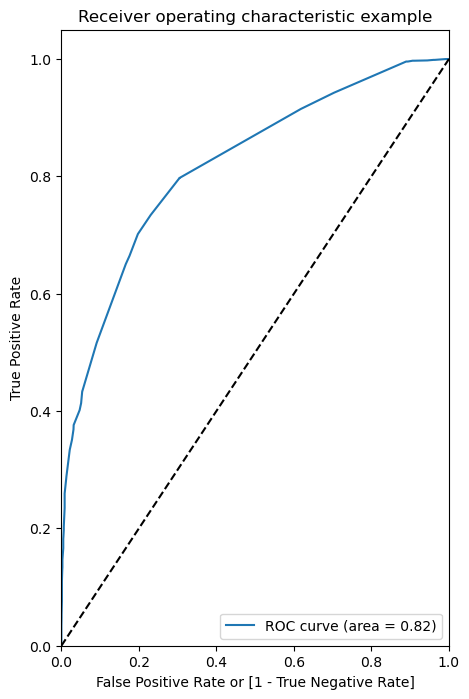

In [161]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [162]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1         0.572459    8321          1    1    1    1    1    1   
1          1         0.572459    1612          1    1    1    1    1    1   
2          0         0.232154    6159          0    1    1    1    0    0   
3          1         0.852536    8384          1    1    1    1    1    1   
4          1         0.572459    5291          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0  
1    1    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    0    0    0    0

In [163]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.483424  1.000000  0.000000
0.1   0.1  0.536104  0.995773  0.105934
0.2   0.2  0.538374  0.995773  0.110330
0.3   0.3  0.744323  0.797558  0.694505
0.4   0.4  0.744096  0.797088  0.694505
0.5   0.5  0.752498  0.734147  0.769670
0.6   0.6  0.719119  0.516205  0.909011
0.7   0.7  0.698456  0.434007  0.945934
0.8   0.8  0.678701  0.368718  0.968791
0.9   0.9  0.648955  0.287459  0.987253


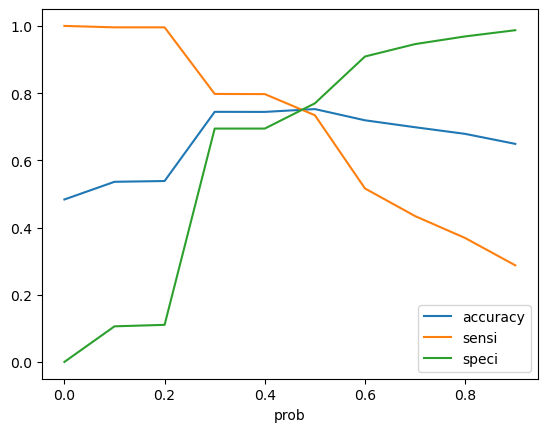

In [164]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* As you can see that around **0.48**, you get the optimal values of the three metrics. So let's choose **0.48** as our cutoff now.

In [165]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1         0.572459    8321          1    1    1    1    1    1   
1          1         0.572459    1612          1    1    1    1    1    1   
2          0         0.232154    6159          0    1    1    1    0    0   
3          1         0.852536    8384          1    1    1    1    1    1   
4          1         0.572459    5291          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    0    0    0    0                1  
1    1    0    0    0    0                1  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    1    0    0    0    0                1

In [166]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','LeadID','final_predicted','Lead_Score']].head()

Converted  Conversion_Prob  LeadID  final_predicted  Lead_Score
0          1         0.572459    8321                1          57
1          1         0.572459    1612                1          57
2          0         0.232154    6159                0          23
3          1         0.852536    8384                1          85
4          1         0.572459    5291                1          57

In [167]:
check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

final_predicted
1    1563
0     566
Name: count, dtype: int64

In [168]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7524977293369663

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1751,  524],
       [ 566, 1563]], dtype=int64)

In [170]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7341474870831376

In [172]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7696703296703297

# Making Predictions on Test Set

### Let's make predictions on the test dataset

In [173]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6187          4.0                         1078                   4.0   
8295          0.0                            0                   0.0   
185           5.0                         1841                   5.0   
162           2.0                           47                   2.0   
7565          2.0                          252                   1.0   

      A free copy of Mastering The Interview  \
6187                                       1   
8295                                       0   
185                                        0   
162                                        1   
7565                                       0   

      L_Origin_Landing Page Submission  L_Origin_Lead Add Form  \
6187                                 1                       0   
8295                                 0                       0   
185                                  0                       0   
162                                  1                       0   
7565                                 0                       1   

      L_Origin_Lead Import  L_Source_Direct Traffic  L_Source_Google  \
6187                     0                        0                1   
8295                     0                        0                0   
185                      0                        0                0   
162                      0                        1                0   
7565                     0                        0                0   

      L_Source_Olark Chat  L_Source_Organic Search  \
6187                    0                        0   
8295                    1                        0   
185                     0                        1   
162                     0                        0   
7565                    0                        0   

      L_Source_Pay per Click Ads  L_Source_Reference  L_Source_Referral Sites  \
6187                           0                   0                        0   
8295                           0                   0                        0   
185                            0                   0                        0   
162                            0                   0                        0   
7565                           0                   1                        0   

      L_Source_Social Media  L_Source_Welingak Website  L_Source_testone  \
6187                      0                          0                 0   
8295                      0                          0                 0   
185                       0                          0                 0   
162                       0                          0                 0   
7565                      0                          0                 0   

      LAct_Converted to Lead  LAct_Email Bounced  LAct_Email Link Clicked  \
6187                       0                   0                        0   
8295                       0                   0                        0   
185                        0                   0                        0   
162                        0                   0                        1   
7565                       0                   0                        0   

      LAct_Email Opened  LAct_Form Submitted on Website  \
6187                  0                               0   
8295                  1                               0   
185                   0                               0   
162                   0                               0   
7565                  0                               0   

      LAct_Olark Chat Conversation  LAct_Page Visited on Website  \
6187                             0                             0   
8295                             0                             0   
185                              1                             0   
162                              0                             0   
7565                       

In [174]:
# Scaling the test set as well using just 'transform'


# Selecting the columns in X_train for X_test as well
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6187     0.212193                     0.943777              0.855715   
8295    -1.109985                    -0.940140             -1.235636   
185      0.542737                     2.277199              1.378552   
162     -0.448896                    -0.858002             -0.189961   
7565    -0.448896                    -0.499743             -0.712798   

      A free copy of Mastering The Interview  \
6187                                1.435259   
8295                               -0.696738   
185                                -0.696738   
162                                 1.435259   
7565                               -0.696738   

      L_Origin_Landing Page Submission  L_Origin_Lead Add Form  \
6187                                 1                       0   
8295                                 0                       0   
185                                  0                       0   
162                                  1                       0   
7565                                 0                       1   

      L_Origin_Lead Import  L_Source_Direct Traffic  L_Source_Google  \
6187                     0                        0                1   
8295                     0                        0                0   
185                      0                        0                0   
162                      0                        1                0   
7565                     0                        0                0   

      L_Source_Olark Chat  L_Source_Organic Search  \
6187                    0                        0   
8295                    1                        0   
185                     0                        1   
162                     0                        0   
7565                    0                        0   

      L_Source_Pay per Click Ads  L_Source_Reference  L_Source_Referral Sites  \
6187                           0                   0                        0   
8295                           0                   0                        0   
185                            0                   0                        0   
162                            0                   0                        0   
7565                           0                   1                        0   

      L_Source_Social Media  L_Source_Welingak Website  L_Source_testone  \
6187                      0                          0                 0   
8295                      0                          0                 0   
185                       0                          0                 0   
162                       0                          0                 0   
7565                      0                          0                 0   

      LAct_Converted to Lead  LAct_Email Bounced  LAct_Email Link Clicked  \
6187                       0                   0                        0   
8295                       0                   0                        0   
185                        0                   0                        0   
162                        0                   0                        1   
7565                       0                   0                        0   

      LAct_Email Opened  LAct_Form Submitted on Website  \
6187                  0                               0   
8295                  1                               0   
185                   0                               0   
162                   0                               0   
7565                  0                               0   

      LAct_Olark Chat Conversation  LAct_Page Visited on Website  \
6187                             0                             0   
8295                             0                             0   
185                              1                             0   
162                              0                             0   
7565                       

In [175]:
X_test = X_test[coll]
X_test.head()

L_Origin_Lead Add Form  L_Source_Direct Traffic  \
6187                       0                        0   
8295                       0                        0   
185                        0                        0   
162                        0                        1   
7565                       1                        0   

      L_Source_Organic Search  L_Source_Referral Sites  \
6187                        0                        0   
8295                        0                        0   
185                         1                        0   
162                         0                        0   
7565                        0                        0   

      L_Source_Welingak Website  LAct_Email Bounced  LAct_SMS Sent  \
6187                          0                   0              1   
8295                          0                   0              0   
185                           0                   0              0   
162                           0                   0              0   
7565                          0                   0              0   

      Occupation_Housewife  Occupation_Working Professional  \
6187                     0                                0   
8295                     0                                0   
185                      0                                0   
162                      0                                0   
7565                     0                                0   

      Lead Profile_Dual Specialization Student  Lead Profile_Lateral Student  \
6187                                         0                             0   
8295                                         0                             0   
185                                          0                             0   
162                                          0                             0   
7565                                         0                             0   

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
6187                            0                                   0   
8295                            0                                   0   
185                             0                                   0   
162                             0                                   0   
7565                            0                                   0   

      N_Act_Had a Phone Conversation  N_Act_Unreachable  
6187                               0                  0  
8295                               0                  0  
185                                0                  0  
162                                0                  0  
7565                               0                  0

In [176]:
X_test.columns

Index(['L_Origin_Lead Add Form', 'L_Source_Direct Traffic',
       'L_Source_Organic Search', 'L_Source_Referral Sites',
       'L_Source_Welingak Website', 'LAct_Email Bounced', 'LAct_SMS Sent',
       'Occupation_Housewife', 'Occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'N_Act_Had a Phone Conversation',
       'N_Act_Unreachable'],
      dtype='object')

In [177]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[coll])

In [178]:
# Checking X_test_sm

X_test_sm

const  L_Origin_Lead Add Form  L_Source_Direct Traffic  \
6187    1.0                       0                        0   
8295    1.0                       0                        0   
185     1.0                       0                        0   
162     1.0                       0                        1   
7565    1.0                       1                        0   
...     ...                     ...                      ...   
2764    1.0                       1                        0   
4679    1.0                       0                        0   
5346    1.0                       0                        0   
4556    1.0                       0                        0   
6671    1.0                       0                        0   

      L_Source_Organic Search  L_Source_Referral Sites  \
6187                        0                        0   
8295                        0                        0   
185                         1                        0   
162                         0                        0   
7565                        0                        0   
...                       ...                      ...   
2764                        0                        0   
4679                        0                        0   
5346                        0                        0   
4556                        0                        0   
6671                        0                        0   

      L_Source_Welingak Website  LAct_Email Bounced  LAct_SMS Sent  \
6187                          0                   0              1   
8295                          0                   0              0   
185                           0                   0              0   
162                           0                   0              0   
7565                          0                   0              0   
...                         ...                 ...            ...   
2764                          0                   0              1   
4679                          0                   0              0   
5346                          0                   0              1   
4556                          0                   0              1   
6671                          0                   0              0   

      Occupation_Housewife  Occupation_Working Professional  \
6187                     0                                0   
8295                     0                                0   
185                      0                                0   
162                      0                                0   
7565                     0                                0   
...                    ...                              ...   
2764                     0                                1   
4679                     0                                0   
5346                     0                                0   
4556                     0                                0   
6671                     0                                0   

      Lead Profile_Dual Specialization Student  Lead Profile_Lateral Student  \
6187                                         0                             0   
8295                                         0                             0   
185                                          0                             0   
162                                          0                             0   
7565                                         0                             0   
...                                        ...                           ...   
2764                                         0                             0   
4679                                         0                             0   
5346                                         0                             0   
4556                                         0                             0   
6671                                         0                

In [179]:
X_test.drop(['Lead Profile_Dual Specialization Student', 'N_Act_Had a Phone Conversation',
             'Occupation_Housewife', 'Lead Profile_Lateral Student','L_Source_Referral Sites'],axis = 1, inplace = True)

In [180]:
res

In [181]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

6187    0.572459
8295    0.287226
185     0.232154
162     0.202880
7565    0.746638
7231    0.287226
6954    0.202880
936     0.746638
4483    0.572459
6069    0.572459
dtype: float64

In [182]:
y_test_pred[:10]

6187    0.572459
8295    0.287226
185     0.232154
162     0.202880
7565    0.746638
7231    0.287226
6954    0.202880
936     0.746638
4483    0.572459
6069    0.572459
dtype: float64

In [183]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
# Let's see the head

y_pred_1.head()

0
6187  0.572459
8295  0.287226
185   0.232154
162   0.202880
7565  0.746638

In [185]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [186]:
y_test_df['Prospect ID'] = y_test_df.index

In [187]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [188]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [189]:
# Check 'y_pred_final'

y_pred_final.head()

Converted  Prospect ID         0
0          0         6187  0.572459
1          1         8295  0.287226
2          0          185  0.232154
3          0          162  0.202880
4          1         7565  0.746638

In [190]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [191]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Prospect ID  Conversion_Prob
0          0         6187         0.572459
1          1         8295         0.287226
2          0          185         0.232154
3          0          162         0.202880
4          1         7565         0.746638

In [192]:
#Assigning a lead score

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0. else 0)

In [193]:
# Check y_pred_final

y_pred_final.head()

Converted  Prospect ID  Conversion_Prob  final_predicted
0          0         6187         0.572459                1
1          1         8295         0.287226                1
2          0          185         0.232154                1
3          0          162         0.202880                1
4          1         7565         0.746638                1

In [194]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.4793432203389831

In [195]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[  0, 983],
       [  0, 905]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

1.0

In [198]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.0

# Precision-Recall View
Let's now also build the training model using the precision-recall view

In [199]:
#Looking at the confusion matrix again

In [200]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1751,  524],
       [ 566, 1563]], dtype=int64)

In [201]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7489218974604696

In [202]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7341474870831376

# Precision and recall tradeoff

In [203]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       1
        ..
 4399    1
 4400    0
 4401    0
 4402    0
 4403    1
 Name: Converted, Length: 4404, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 4399    1
 4400    0
 4401    1
 4402    0
 4403    0
 Name: Predicted, Length: 4404, dtype: int64)

In [204]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

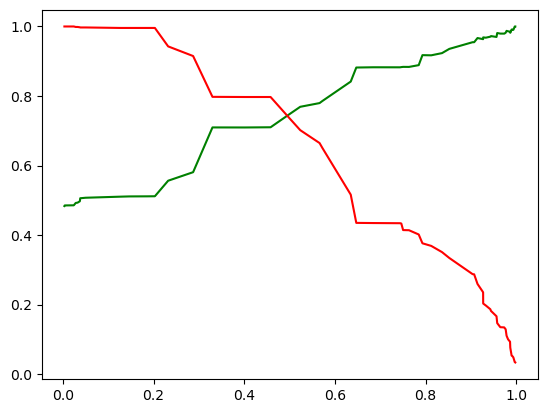

In [205]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [206]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head(25)

Converted  Conversion_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0           1         0.572459    8321          1    1    1    1    1    1   
1           1         0.572459    1612          1    1    1    1    1    1   
2           0         0.232154    6159          0    1    1    1    0    0   
3           1         0.852536    8384          1    1    1    1    1    1   
4           1         0.572459    5291          1    1    1    1    1    1   
5           0         0.232154    7998          0    1    1    1    0    0   
6           0         0.287226    1495          0    1    1    1    0    0   
7           1         0.998139    5817          1    1    1    1    1    1   
8           1         0.572459    3307          1    1    1    1    1    1   
9           1         0.987052    4675          1    1    1    1    1    1   
10          1         0.852536    4983          1    1    1    1    1    1   
11          0         0.287226    2327          0    1    1    1    0    0   
12          0         0.287226    6233          0    1    1    1    0    0   
13          1         0.986552    4940          1    1    1    1    1    1   
14          0         0.572459    8485          1    1    1    1    1    1   
15          0         0.501149    8553          1    1    1    1    1    1   
16          1         0.523571    2387          1    1    1    1    1    1   
17          1         0.958233     262          1    1    1    1    1    1   
18          0         0.287226    2366          0    1    1    1    0    0   
19          0         0.202880    5609          0    1    1    1    0    0   
20          0         0.572459    3199          1    1    1    1    1    1   
21          1         0.202880    6484          0    1    1    1    0    0   
22          1         0.501149    3190          1    1    1    1    1    1   
23          0         0.202880     169          0    1    1    1    0    0   
24          1         0.458197    4757          0    1    1    1    1    1   

    0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0     1    0    0    0    0                1          57  
1     1    0    0    0    0                1          57  
2     0    0    0    0    0                0          23  
3     1    1    1    1    0                1          85  
4     1    0    0    0    0                1          57  
5     0    0    0    0    0                0          23  
6     0    0    0    0    0                0          29  
7     1    1    1    1    1                1         100  
8     1    0    0    0    0                1          57  
9     1    1    1    1    1                1          99  
10    1    1    1    1    0                1          85  
11    0    0    0    0    0                0          29  
12    0    0    0    0    0                0          29  
13    1    1    1    1    1                1          99  
14    1    0    0    0    0                1          57  
15    1    0    0    0    0                1          50  
16    1    0    0    0    0                1          52  
17    1    1    1    1    1                1          96  
18    0    0    0    0    0                0          29  
19    0    0    0    0    0                0          20  
20    1    0    0    0    0                1          57  
21    0    0    0    0    0                0          20  
22    1    0    0    0    0                1          50  
23    0    0    0    0    0                0          20  
24    0    0    0    0    0                0          46

In [207]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7524977293369663

In [208]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1751,  524],
       [ 566, 1563]], dtype=int64)

In [209]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
TP/(TP+FP)

0.7489218974604696

In [211]:
TP/(TP+FN)

0.7341474870831376

# Making Predictions on the Test Set

In [212]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [213]:
y_test_pred[:10]

6187    0.572459
8295    0.287226
185     0.232154
162     0.202880
7565    0.746638
7231    0.287226
6954    0.202880
936     0.746638
4483    0.572459
6069    0.572459
dtype: float64

In [214]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [215]:
# Let's see the head

y_pred_1.head()

0
6187  0.572459
8295  0.287226
185   0.232154
162   0.202880
7565  0.746638

In [216]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [217]:
y_test_df['Prospect ID'] = y_test_df.index

In [218]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [219]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [220]:
# Checking the 'y_pred_final'

y_pred_final.head()

Converted  Prospect ID         0
0          0         6187  0.572459
1          1         8295  0.287226
2          0          185  0.232154
3          0          162  0.202880
4          1         7565  0.746638

In [221]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [222]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Prospect ID  Conversion_Prob
0          0         6187         0.572459
1          1         8295         0.287226
2          0          185         0.232154
3          0          162         0.202880
4          1         7565         0.746638

In [223]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [224]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.48 else 0)

In [233]:
# Checking y_pred_final

y_pred_final.head(10)

Prospect ID  Converted  Conversion_Prob  Lead_Score  final_predicted
0         6187          0         0.572459          57                1
1         8295          1         0.287226          29                0
2          185          0         0.232154          23                0
3          162          0         0.202880          20                0
4         7565          1         0.746638          75                1
5         7231          1         0.287226          29                0
6         6954          0         0.202880          20                0
7          936          1         0.746638          75                1
8         4483          0         0.572459          57                1
9         6069          1         0.572459          57                1

In [226]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7600635593220338

In [227]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[773, 210],
       [243, 662]], dtype=int64)

In [228]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Calculating the Precision

TP/(TP+FP)

0.7591743119266054

In [230]:
# Calculating Recall

TP/(TP+FN)

0.7314917127071823